In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
pd.set_option('display.max_columns', None)
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import geopandas as gpd

In [2]:
pip install geopandas 

Note: you may need to restart the kernel to use updated packages.


## - General Glimpse

In [3]:
data = pd.read_csv('fifa21_male2.csv', sep=",")
data.head()


ID         Name  Age  OVA            Nationality           Club  BOV   BP  \
0   2  G. Pasquale   33   69                  Italy        Udinese   71  LWB   
1  16  Luis García   37   71                  Spain      KAS Eupen   70   CM   
2  27      J. Cole   33   71                England  Coventry City   71  CAM   
3  36     D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   ST   
4  41      Iniesta   36   81                  Spain    Vissel Kobe   82  CAM   

       Position                                       Player Photo  \
0            LM  https://cdn.sofifa.com/players/000/002/16_120.png   
1    CM CAM CDM  https://cdn.sofifa.com/players/000/016/19_120.png   
2  CAM RM RW LM  https://cdn.sofifa.com/players/000/027/16_120.png   
3           NaN  https://cdn.sofifa.com/players/000/036/09_120.png   
4        CM CAM  https://cdn.sofifa.com/players/000/041/20_120.png   

                                          Club Logo  \
0      https://cdn.sofifa.com/teams/55/light_60.png   
1    https://cdn.sofifa.com/teams/2013/light_60.png   
2    https://cdn.sofifa.com/teams/1800/light_60.png   
3     https://cdn.sofifa.com/teams/106/light_60.png   
4  https://cdn.sofifa.com/teams/101146/light_60.png   

                                Flag Photo  POT            Team & Contract  \
0      https://cdn.sofifa.com/flags/it.png   69        Udinese 2008 ~ 2016   
1      https://cdn.sofifa.com/flags/es.png   71      KAS Eupen 2014 ~ 2019   
2  https://cdn.sofifa.com/flags/gb-eng.png   71  Coventry City 2016 ~ 2020   
3      https://cdn.sofifa.com/flags/tt.png   82            Sunderland 2009   
4      https://cdn.sofifa.com/flags/es.png   81    Vissel Kobe 2018 ~ 2021   

  Height  Weight   foot  Growth        Joined Loan Date End  Value  Wage  \
0   6'0"  181lbs   Left       0   Jul 1, 2008           NaN  €625K   €7K   
1  5'10"  143lbs  Right       0  Jul 19, 2014           NaN  €600K   €7K   
2   5'9"  161lbs  Right       0   Jan 7, 2016           NaN  €1.1M  €15K   
3  5'11"  165lbs  Right      14           NaN           NaN     €0    €0   
4   5'7"  150lbs  Right       0  Jul 16, 2018           NaN  €5.5M  €12K   

  Release Clause     Contract  Attacking  Crossing  Finishing  \
0             €0  2008 ~ 2016        313        75         50   
1          €1.1M  2014 ~ 2019        337        68         64   
2             €0  2016 ~ 2020        337        80         64   
3             €0         2009        264        54         70   
4          €7.2M  2018 ~ 2021        367        75         69   

   Heading Accuracy  Short Passing  Volleys  Skill  Dribbling  Curve  \
0                59             71     58.0    338         73   65.0   
1                61             76     68.0    369         69   79.0   
2                41             77     75.0    387         79   84.0   
3                60             80      NaN    255         68    NaN   
4                54             90     79.0    408         85   80.0   

   FK Accuracy  Long Passing  Ball Control  Movement  Acceleration  \
0           60            69            71       347            68   
1           79            71            71       305            56   
2           77            69            78       295            48   
3           46            64            77       176            59   
4           70            83            90       346            61   

   Sprint Speed  Agility  Reactions  Balance  Power  Shot Power  Jumping  \
0            74     68.0         69     68.0    347          74     68.0   
1            50     62.0         65     72.0    324          75     54.0   
2            42     71.0         59     75.0    284          72     58.0   
3            62      NaN         55      NaN    239          63      NaN   
4            56     79.0         75     75.0    297          67     40.0   

   Stamina  Strength  Long Shots  Mentality  Aggression  Interceptions  \
0       69        68          68        320          72           69

In [4]:
data.shape

(17125, 107)

In [5]:
#Split of positions by field zone (not necessary for GK)
data["Position"][data["BP"].isin(["LWB","CB","RWB","LB","RB"])] = "DF"
data["Position"][data["BP"].isin(["CDM","CM","CAM","RM","LM"])] = "MF"
data["Position"][data["BP"].isin(["ST","CF","LW","RW"])] = "AT"

In [6]:
data["Position"].head()

0    DF
1    MF
2    MF
3    AT
4    MF
Name: Position, dtype: object

In [7]:
##We select what we want to predict he position
dataPosition=data[["Age","OVA","Nationality","Club","BOV","Position","POT","Value","Crossing","Finishing","Heading Accuracy","Short Passing","Volleys","Dribbling","Curve","FK Accuracy","Long Passing","Ball Control","Acceleration","Sprint Speed","Agility","Reactions","Balance","Shot Power", "Jumping", "Stamina", "Strength", "Long Shots","Aggression","Interceptions","Positioning","Vision","Penalties","Marking","Standing Tackle","Sliding Tackle","GK Diving","GK Handling","GK Kicking","GK Positioning", "GK Reflexes"]]
dataPosition.head()

Age  OVA            Nationality           Club  BOV Position  POT  Value  \
0   33   69                  Italy        Udinese   71       DF   69  €625K   
1   37   71                  Spain      KAS Eupen   70       MF   71  €600K   
2   33   71                England  Coventry City   71       MF   71  €1.1M   
3   36   68  Trinidad &amp; Tobago     Sunderland   70       AT   82     €0   
4   36   81                  Spain    Vissel Kobe   82       MF   81  €5.5M   

   Crossing  Finishing  Heading Accuracy  Short Passing  Volleys  Dribbling  \
0        75         50                59             71     58.0         73   
1        68         64                61             76     68.0         69   
2        80         64                41             77     75.0         79   
3        54         70                60             80      NaN         68   
4        75         69                54             90     79.0         85   

   Curve  FK Accuracy  Long Passing  Ball Control  Acceleration  Sprint Speed  \
0   65.0           60            69            71            68            74   
1   79.0           79            71            71            56            50   
2   84.0           77            69            78            48            42   
3    NaN           46            64            77            59            62   
4   80.0           70            83            90            61            56   

   Agility  Reactions  Balance  Shot Power  Jumping  Stamina  Strength  \
0     68.0         69     68.0          74     68.0       69        68   
1     62.0         65     72.0          75     54.0       64        60   
2     71.0         59     75.0          72     58.0       29        56   
3      NaN         55      NaN          63      NaN       51        66   
4     79.0         75     75.0          67     40.0       58        62   

   Long Shots  Aggression  Interceptions  Positioning  Vision  Penalties  \
0          68          72           69.0         63.0    66.0         50   
1          71          71           71.0         72.0    73.0         75   
2          69          69           39.0         69.0    74.0         66   
3          59          59           70.0         72.0     NaN         70   
4          70          58           70.0         78.0    93.0         71   

   Marking  Standing Tackle  Sliding Tackle  GK Diving  GK Handling  \
0       70               69            69.0         14            5   
1       70               43            40.0          9           12   
2       35               34            30.0          9            6   
3       34               41             NaN          5           21   
4       68               57            56.0          6           13   

   GK Kicking  GK Positioning  GK Reflexes  
0          15              10           12  
1          13              11           11  
2          13              16            7  
3          64              21           21  
4           6              13            7

In [8]:
dataPosition.describe()

Age           OVA           BOV           POT      Crossing  \
count  17125.000000  17125.000000  17125.000000  17125.000000  17125.000000   
mean      25.272934     66.965022     67.900204     72.489810     51.621314   
std        4.942665      6.864329      6.637538      5.769949     17.875715   
min       16.000000     38.000000     42.000000     47.000000      6.000000   
25%       21.000000     62.000000     64.000000     69.000000     41.000000   
50%       25.000000     67.000000     68.000000     72.000000     56.000000   
75%       29.000000     72.000000     72.000000     76.000000     65.000000   
max       53.000000     93.000000     93.000000     95.000000     94.000000   

          Finishing  Heading Accuracy  Short Passing       Volleys  \
count  17125.000000      17125.000000   17125.000000  17067.000000   
mean      47.956672         53.598832      60.507620     45.005742   
std       19.391547         16.947164      13.960635     17.729483   
min        3.000000          5.000000       7.000000      4.000000   
25%       33.000000         46.000000      56.000000     32.000000   
50%       52.000000         57.000000      63.000000     46.000000   
75%       64.000000         65.000000      69.000000     59.000000   
max       95.000000         93.000000      94.000000     90.000000   

          Dribbling         Curve   FK Accuracy  Long Passing  Ball Control  \
count  17125.000000  17067.000000  17125.000000  17125.000000  17125.000000   
mean      57.846423     49.574676     44.387270     54.324321     60.642803   
std       18.047250     18.188344     17.504128     14.856911     15.873647   
min        5.000000      4.000000      5.000000      9.000000      5.000000   
25%       53.000000     37.000000     32.000000     45.000000     57.000000   
50%       63.000000     51.000000     43.000000     57.000000     64.000000   
75%       70.000000     64.000000     58.000000     65.000000     70.000000   
max       96.000000     94.000000     94.000000     93.000000     96.000000   

       Acceleration  Sprint Speed       Agility     Reactions       Balance  \
count  17125.000000  17125.000000  17067.000000  17125.000000  17067.000000   
mean      65.445898     65.443036     64.602273     62.924847     64.715591   
std       14.657889     14.437377     14.372443      9.037279     14.031563   
min       12.000000     11.000000     14.000000     24.000000     17.000000   
25%       58.000000     59.000000     57.000000     57.000000     57.000000   
50%       68.000000     68.000000     67.000000     63.000000     67.000000   
75%       75.000000     75.000000     75.000000     69.000000     75.000000   
max       97.000000     96.000000     96.000000     96.000000     97.000000   

         Shot Power       Jumping       Stamina      Strength    Long Shots  \
count  17125.000000  17067.000000  17125.000000  17125.000000  17125.000000   
mean      59.711416     65.170212     63.309606     65.308555     49.135708   
std       13.417931     11.918063     15.313272     12.627212     19.044862   
min       12.000000     22.000000     11.000000     16.000000      4.000000   
25%       50.000000     58.000000     56.000000     58.000000     35.000000   
50%       61.000000     66.000000     66.000000     67.000000     53.000000   
75%       70.000000     73.000000     73.000000     74.000000     64.000000   
max       95.000000     95.000000     97.000000     97.000000     94.000000   

         Aggression  Interceptions   Positioning        Vision     Penalties  \
count  17125.000000   17118.000000  17118.000000  17067.000000  17125.000000   
mean      56.997839      47.085582     52.372766     55.443605     50.251445   
std       17.021619      20.846705     19.094432     13.730080     15.696363   
min        9.000000       4.000000      2.000000     10.000000      7.000000   
25%       45.000000      26.000000     43.000000     47.000000     40.000000   
50%       60.000000      53.000000     57.000000     57.0

In [9]:
dataPosition.shape

(17125, 41)

## - Data Cleaning

In [10]:
dataPosition.isnull().sum()

Age                  0
OVA                  0
Nationality          0
Club                23
BOV                  0
Position            58
POT                  0
Value                0
Crossing             0
Finishing            0
Heading Accuracy     0
Short Passing        0
Volleys             58
Dribbling            0
Curve               58
FK Accuracy          0
Long Passing         0
Ball Control         0
Acceleration         0
Sprint Speed         0
Agility             58
Reactions            0
Balance             58
Shot Power           0
Jumping             58
Stamina              0
Strength             0
Long Shots           0
Aggression           0
Interceptions        7
Positioning          7
Vision              58
Penalties            0
Marking              0
Standing Tackle      0
Sliding Tackle      58
GK Diving            0
GK Handling          0
GK Kicking           0
GK Positioning       0
GK Reflexes          0
dtype: int64

In [11]:
missing_jumping = dataPosition[dataPosition['Jumping'].isnull()].index.tolist()
missing_balance = dataPosition[dataPosition['Balance'].isnull()].index.tolist()
if missing_jumping == missing_balance:
    print('They are same')
else:
    print('They are different')

They are same


In [12]:
dataPosition = dataPosition[dataPosition['Club'].notna()]
dataPosition = dataPosition[dataPosition['Agility'].notna()]
dataPosition = dataPosition[dataPosition['Position'].notna()]
dataPosition.shape

(16992, 41)

In [13]:
dataPosition.isnull().sum()

Age                 0
OVA                 0
Nationality         0
Club                0
BOV                 0
Position            0
POT                 0
Value               0
Crossing            0
Finishing           0
Heading Accuracy    0
Short Passing       0
Volleys             0
Dribbling           0
Curve               0
FK Accuracy         0
Long Passing        0
Ball Control        0
Acceleration        0
Sprint Speed        0
Agility             0
Reactions           0
Balance             0
Shot Power          0
Jumping             0
Stamina             0
Strength            0
Long Shots          0
Aggression          0
Interceptions       0
Positioning         0
Vision              0
Penalties           0
Marking             0
Standing Tackle     0
Sliding Tackle      0
GK Diving           0
GK Handling         0
GK Kicking          0
GK Positioning      0
GK Reflexes         0
dtype: int64

In [14]:
dataPosition.Position.unique()

array(['DF', 'MF', 'AT', 'GK', 'GK RB'], dtype=object)

In [15]:
#we have to delete that value 'GK RB'
dataPosition = dataPosition[dataPosition['Position'].isin(['DF', 'MF', 'AT', 'GK'])]

In [16]:
# Standardize header names

dataPosition_cols=dataPosition.columns
cols = [col_name.lower().replace(' ', '_') for col_name in dataPosition_cols]
dataPosition.columns=cols 
dataPosition.columns

Index(['age', 'ova', 'nationality', 'club', 'bov', 'position', 'pot', 'value',
       'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'fk_accuracy', 'long_passing', 'ball_control',
       'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance',
       'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes'],
      dtype='object')

In [17]:
# Removing"€" from value column values.
dataPosition['value'] = dataPosition['value'].str.replace('€', '')

In [18]:
def value_to_int(df_value):
    try:
        value = float(df_value[1:-1])
        suffix = df_value[-1:]

        if suffix == 'M':
            value = value * 1000000
        elif suffix == 'K':
            value = value * 1000
    except ValueError:
        value = 0
    return value

dataPosition['value'] = dataPosition['value'].apply(value_to_int)


In [19]:
dataPosition.value.unique()

array([2.5e+04, 0.0e+00, 1.0e+05, 5.0e+05, 8.0e+05, 2.0e+04, 9.0e+04,
       2.0e+05, 5.0e+04, 3.0e+05, 7.5e+04, 5.0e+03, 3.0e+04, 6.0e+05,
       7.0e+05, 4.0e+05, 9.0e+05, 5.5e+06, 1.0e+04, 4.0e+04, 6.0e+06,
       7.0e+04, 8.0e+04, 3.0e+06, 9.5e+06, 6.5e+06, 4.5e+06, 1.0e+06,
       6.0e+04, 7.5e+06, 5.0e+06, 7.0e+06, 1.5e+06, 9.0e+06, 2.5e+06,
       3.5e+06, 2.0e+06, 4.0e+06, 8.5e+06, 8.0e+06])

In [20]:
dataPosition.head()

age  ova nationality              club  bov position  pot     value  \
0   33   69       Italy           Udinese   71       DF   69   25000.0   
1   37   71       Spain         KAS Eupen   70       MF   71       0.0   
2   33   71     England     Coventry City   71       MF   71  100000.0   
4   36   81       Spain       Vissel Kobe   82       MF   81  500000.0   
5   27   66     Germany  Alemannia Aachen   66       AT   70   25000.0   

   crossing  finishing  heading_accuracy  short_passing  volleys  dribbling  \
0        75         50                59             71     58.0         73   
1        68         64                61             76     68.0         69   
2        80         64                41             77     75.0         79   
4        75         69                54             90     79.0         85   
5        61         53                42             58     57.0         67   

   curve  fk_accuracy  long_passing  ball_control  acceleration  sprint_speed  \
0   65.0           60            69            71            68            74   
1   79.0           79            71            71            56            50   
2   84.0           77            69            78            48            42   
4   80.0           70            83            90            61            56   
5   61.0           42            44            62            90            91   

   agility  reactions  balance  shot_power  jumping  stamina  strength  \
0     68.0         69     68.0          74     68.0       69        68   
1     62.0         65     72.0          75     54.0       64        60   
2     71.0         59     75.0          72     58.0       29        56   
4     79.0         75     75.0          67     40.0       58        62   
5     75.0         65     85.0          71     70.0       64        61   

   long_shots  aggression  interceptions  positioning  vision  penalties  \
0          68          72           69.0         63.0    66.0         50   
1          71          71           71.0         72.0    73.0         75   
2          69          69           39.0         69.0    74.0         66   
4          70          58           70.0         78.0    93.0         71   
5          49          63           26.0         63.0    58.0         46   

   marking  standing_tackle  sliding_tackle  gk_diving  gk_handling  \
0       70               69            69.0         14            5   
1       70               43            40.0          9           12   
2       35               34            30.0          9            6   
4       68               57            56.0          6           13   
5       22               26            31.0          8           13   

   gk_kicking  gk_positioning  gk_reflexes  
0          15              10           12  
1          13              11           11  
2          13              16            7  
4           6              13            7  
5           7               9            9

## - EDA

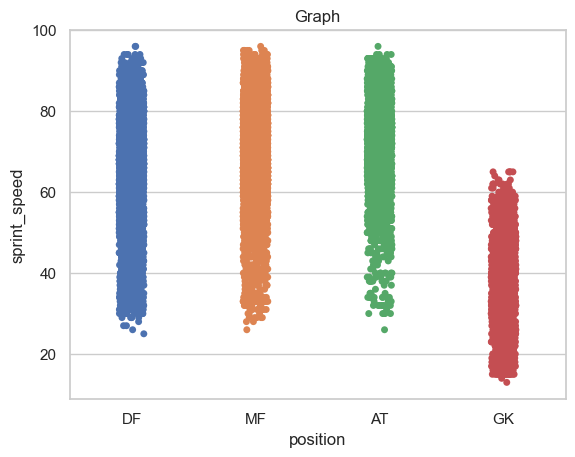

In [21]:

# use to set style of background of plot
sns.set(style="whitegrid")
  
# loading data-set
iris = sns.load_dataset('iris')
  
# plotting strip plot with seaborn
# deciding the attributes of dataset on
# which plot should be made
ax = sns.stripplot(x='position', y='sprint_speed', data=dataPosition)
  
# giving title to the plot
plt.title('Graph')
  
# function to show plot
plt.show()

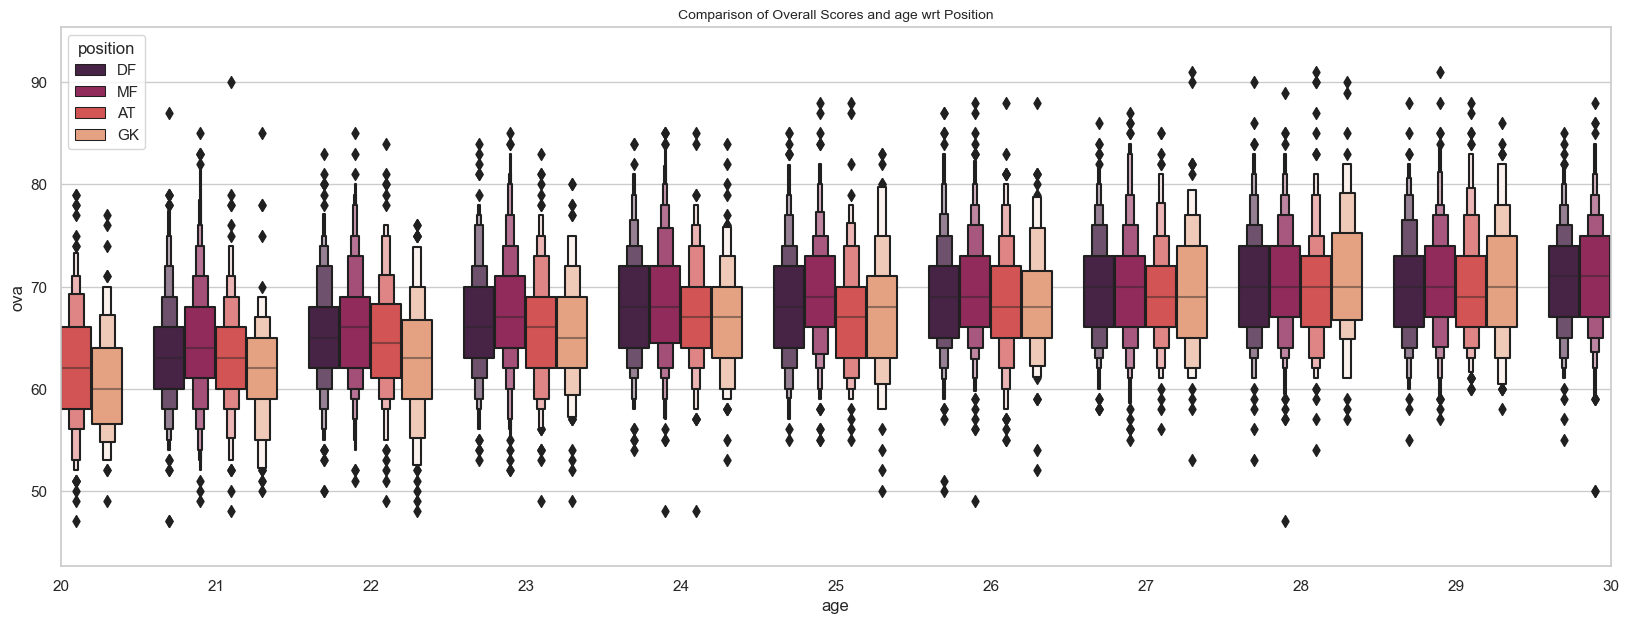

In [22]:
plt.rcParams['figure.figsize'] = (20, 7)
plt.style.use('seaborn-dark-palette')

sns.boxenplot(dataPosition['age'], dataPosition['ova'], hue = dataPosition['position'], palette = 'rocket')
plt.xlim(4,14)
plt.title('Comparison of Overall Scores and age wrt Position', fontsize = 10)
plt.show()

In [23]:
########WORLD##########

In [116]:
shapefile = 'World_Countries/World_Countries.shp'
world_gdf = gpd.read_file(shapefile)
world_gdf["COUNTRY"].unique()

array(['Aruba (Netherlands)', 'Antigua and Barbuda', 'Afghanistan',
       'Algeria', 'Azerbaijan', 'Albania', 'Armenia', 'Andorra', 'Angola',
       'American Samoa (US)', 'Argentina', 'Australia', 'Austria',
       'Anguilla (UK)', 'Antarctica', 'Bahrain', 'Barbados', 'Botswana',
       'Bermuda (UK)', 'Belgium', 'Bahamas', 'Bangladesh', 'Belize',
       'Bosnia and Herzegovina', 'Bolivia', 'Myanmar', 'Benin', 'Belarus',
       'Solomon Islands', 'Brazil', 'Bhutan', 'Bulgaria',
       'Bouvet Island (Norway)', 'Brunei', 'Burundi', 'Canada',
       'Cambodia', 'Chad', 'Sri Lanka', 'Congo',
       'Democratic Republic of the Congo', 'China', 'Chile',
       'Cayman Islands (UK)', 'Cocos (Keeling) Islands (Australia)',
       'Cameroon', 'Comoros', 'Colombia', 'Northern Mariana Islands (US)',
       'Costa Rica', 'Central African Republic', 'Cuba', 'Cape Verde',
       'Cook Islands (New Zealand)', 'Cyprus', 'Denmark', 'Djibouti',
       'Dominica', 'Jarvis Island (US)', 'Dominican Repu

<AxesSubplot:>

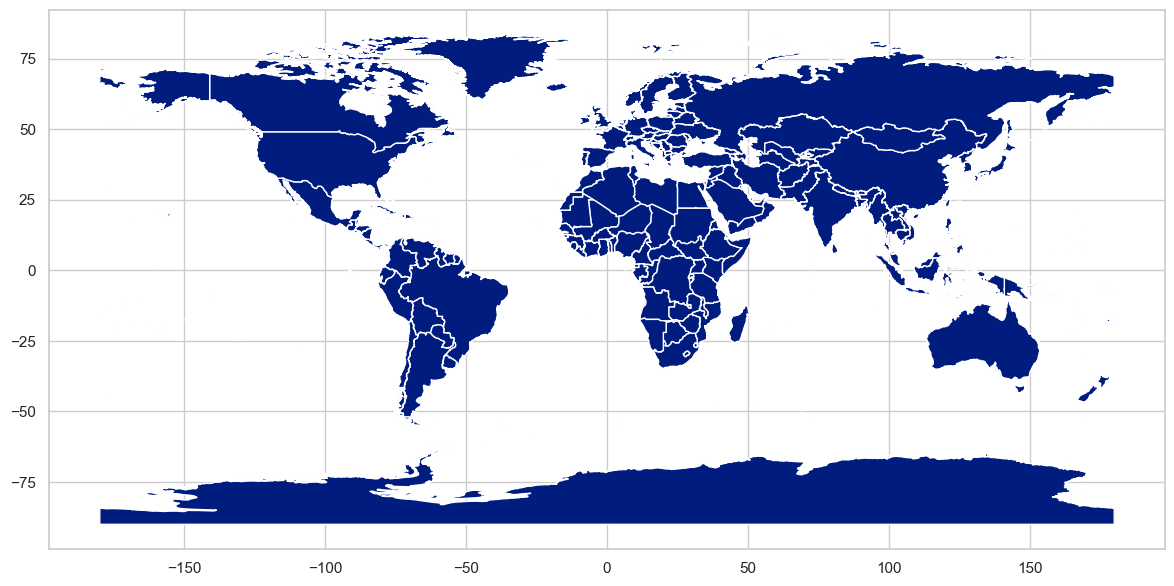

In [25]:
world_gdf.plot()

In [106]:
data["Nationality"][data["Nationality"].isin(["England", "Scotland", "Wales", "Northern Ireland"])] = "United Kingdom"
data['Count'] = data.groupby(['Nationality'])['Name'].transform('count')
df = data[['Nationality','Count']]
df=df.drop_duplicates()
df2 = df.rename({'Nationality': 'COUNTRY', 'Count': 'Count'}, axis=1)

df2.head()

COUNTRY  Count
0                  Italy    565
1                  Spain   1121
2         United Kingdom   2202
3  Trinidad &amp; Tobago      6
5                Germany   1154

In [146]:
merged = world_gdf.merge(df2, on="COUNTRY", how="left")
merged=merged.fillna(0)

<AxesSubplot:>

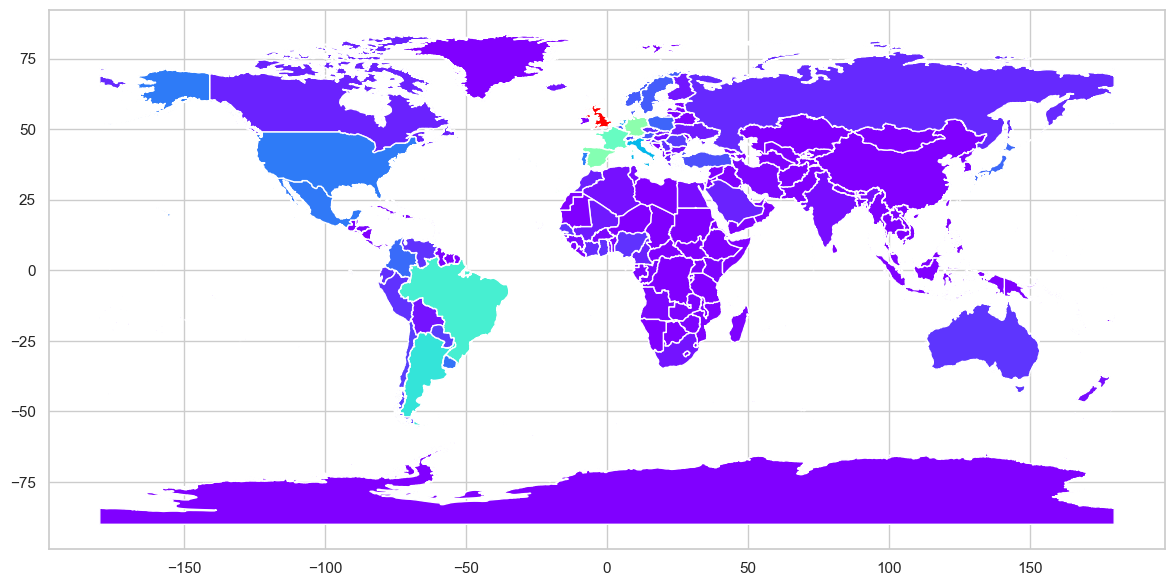

In [147]:
merged.plot(column = 'Count', cmap = 'rainbow')


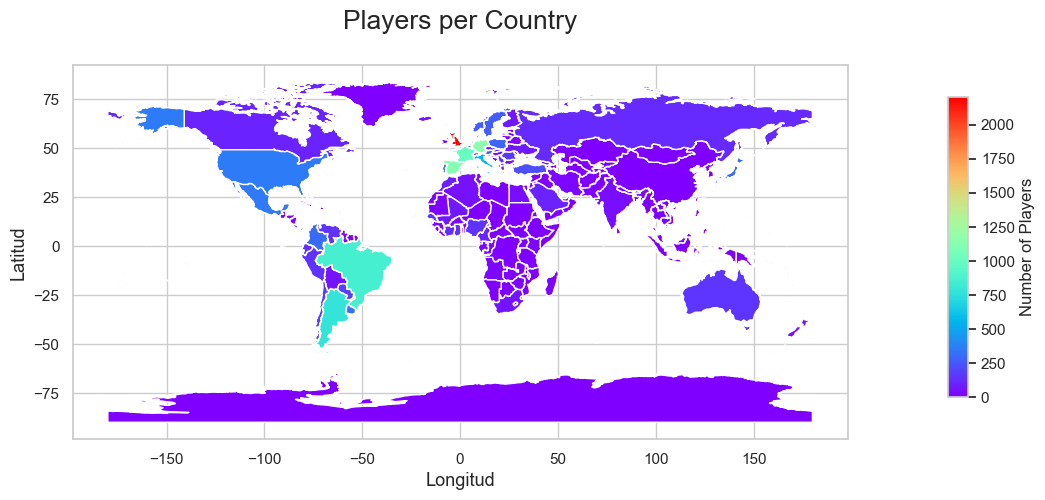

In [150]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
#Título del mapa
title = "Players per Country"
#Impresión del título indicando un renglón entre la figura y el #texto
plt.title(title + '\n', fontsize=19)
#Impresión del mapa indicando qué marco(ax) debe tomar de referencia
merged.plot(column="Count", cmap = "rainbow",ax = ax)
#Nombre de los ejes horizontal y vertical 
ax.set_xlabel('Longitud', fontsize = 13)
ax.set_ylabel('Latitud', fontsize = 13)
#Definición de los valores mínimo y máximo como límites de la barra #a utilizar
min_p = min(merged['Count'])
max_p = max(merged['Count'])
#Definición de la barra gráfica
bar = plt.cm.ScalarMappable(cmap='rainbow', norm=plt.Normalize(vmin = min_p , vmax=max_p))

#Se declara una lista donde se guardarán los valores de la barra
bar._A = []
#Declaración de la ubicación y el tamaño de la barra.
cax = plt.axes([1, 0.35, 0.02, 0.3]) #[xcoord, ycoord, ancho, largo]
# Impresión de la barra con las variables superiores (bar y cax)

cbar = fig.colorbar(bar, cax=cax)
#Título de la barra
cbar.set_label('Number of Players', fontsize = 12)
#Guardado del mapa en un archivo jpg indicando su resolución.


In [174]:
player_features = (
    'Acceleration', 'Aggression', 'Agility', 
    'Balance', 'BallControl', 'Composure', 
    'Crossing', 'Dribbling', 'FKAccuracy', 
    'Finishing', 'GKDiving', 'GKHandling', 
    'GKKicking', 'GKPositioning', 'GKReflexes', 
    'HeadingAccuracy', 'Interceptions', 'Jumping', 
    'LongPassing', 'LongShots', 'Marking', 'Penalties'
)

from math import pi
idx = 1
plt.figure(figsize=(15,45))
for position_name, features in dataPosition.groupby(df['position'])[player_features].mean().iterrows():
    top_features = dict(features.nlargest(5))
    
    # number of variable
    categories=top_features.keys()
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values = list(top_features.values())
    values += values[:1]

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(10, 3, idx, polar=True)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)
 # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75], ["25","50","75"], color="grey", size=7)
    plt.ylim(0,100)
    
    plt.subplots_adjust(hspace = 0.5)
    
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)
    
    plt.title(position_name, size=11, y=1.1)
    
    idx += 1

KeyError: 'position'

<Figure size 1500x4500 with 0 Axes>

#### Split between numerical and categorical

In [151]:
num = dataPosition.select_dtypes(include = np.number)
cat = dataPosition.select_dtypes(include = 'object')

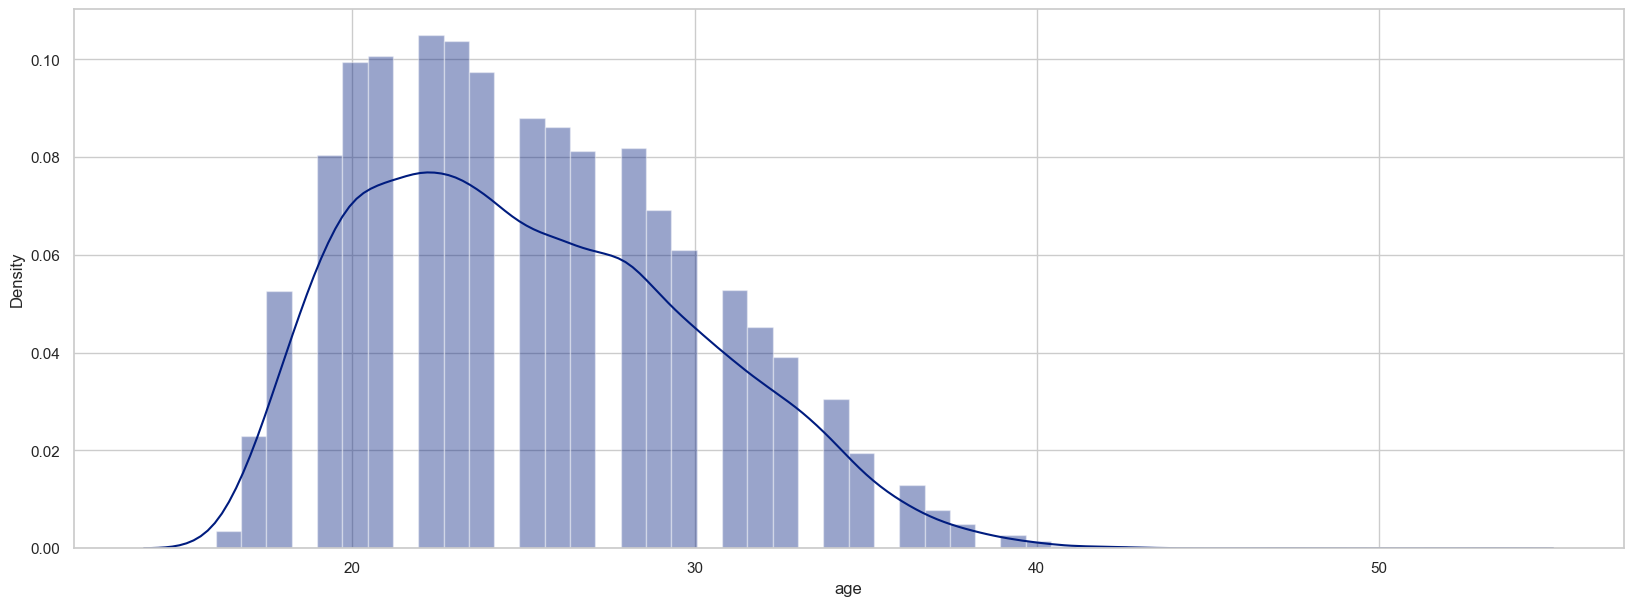

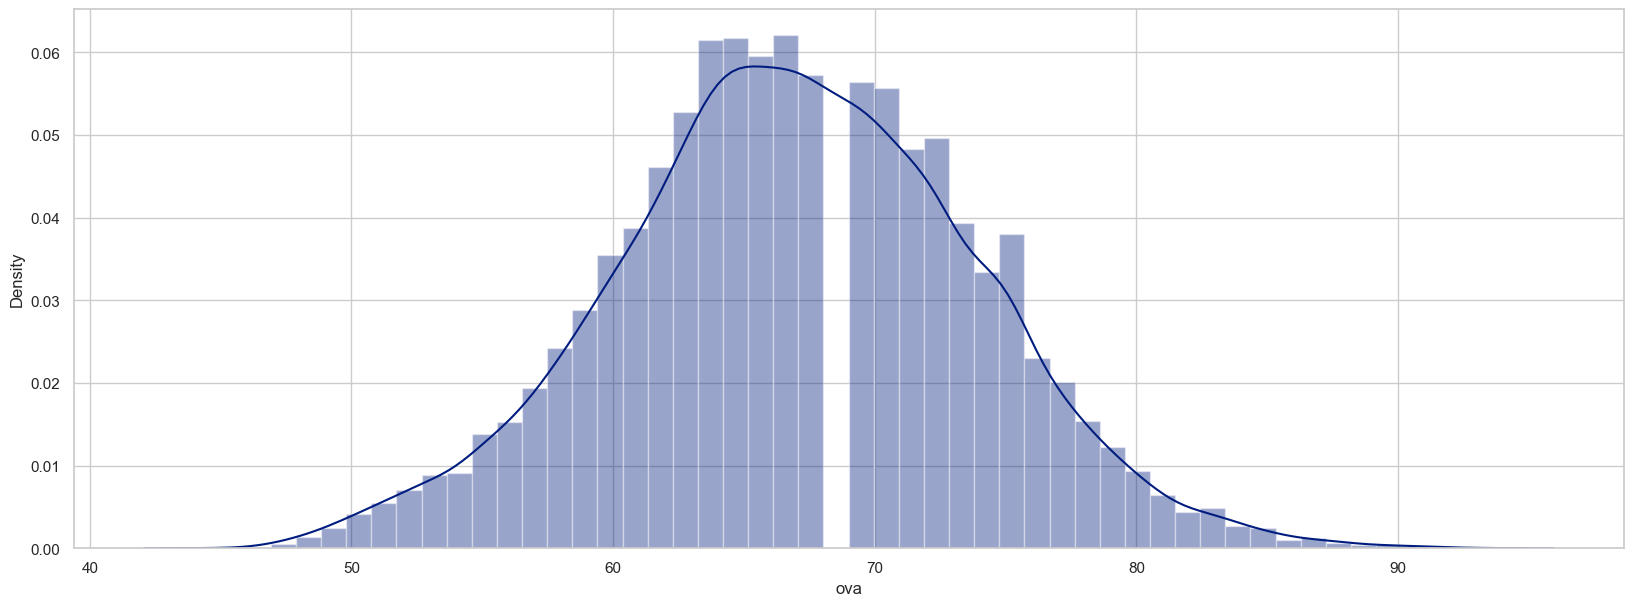

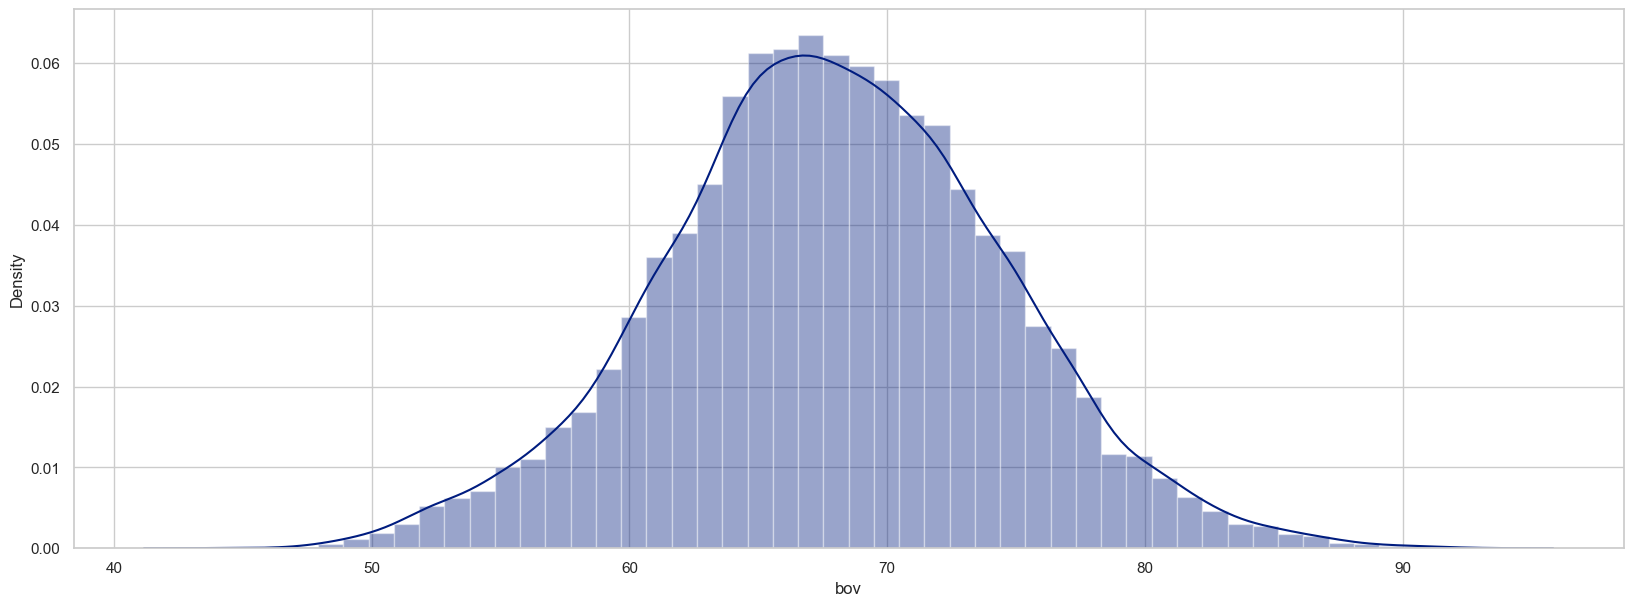

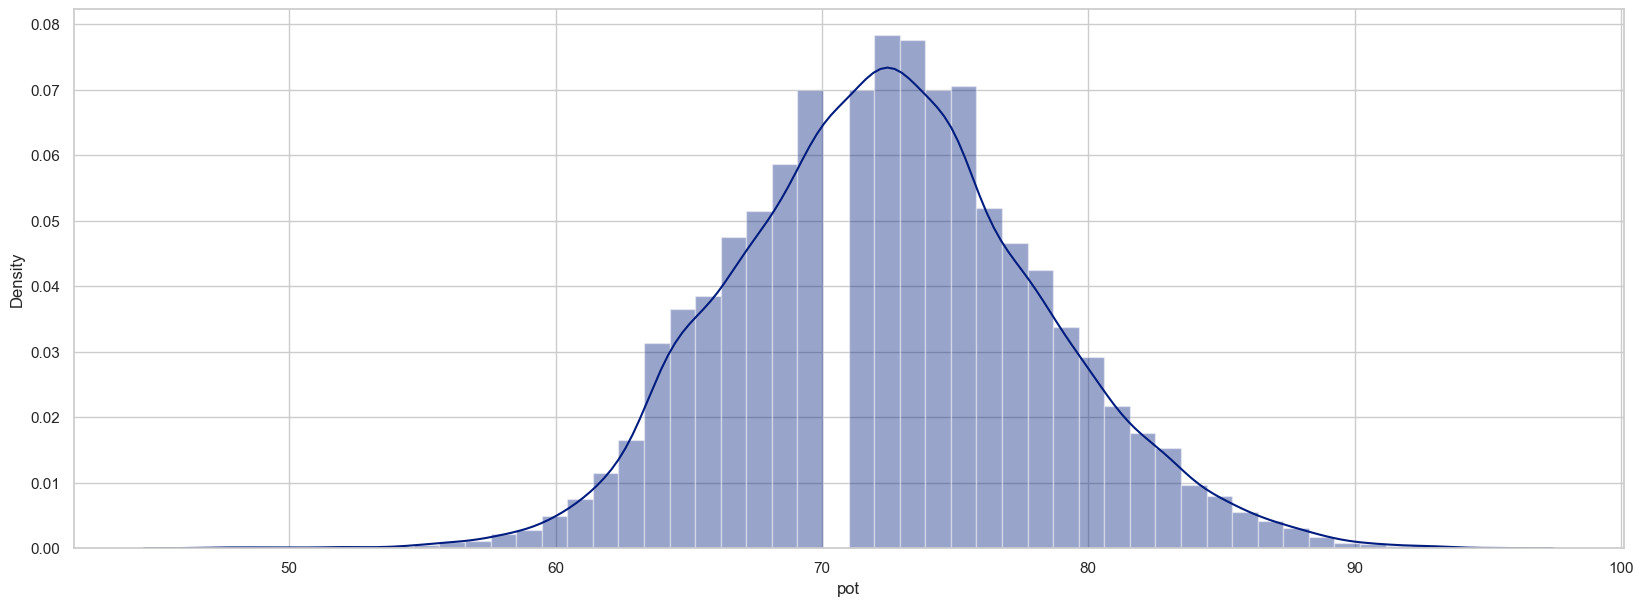

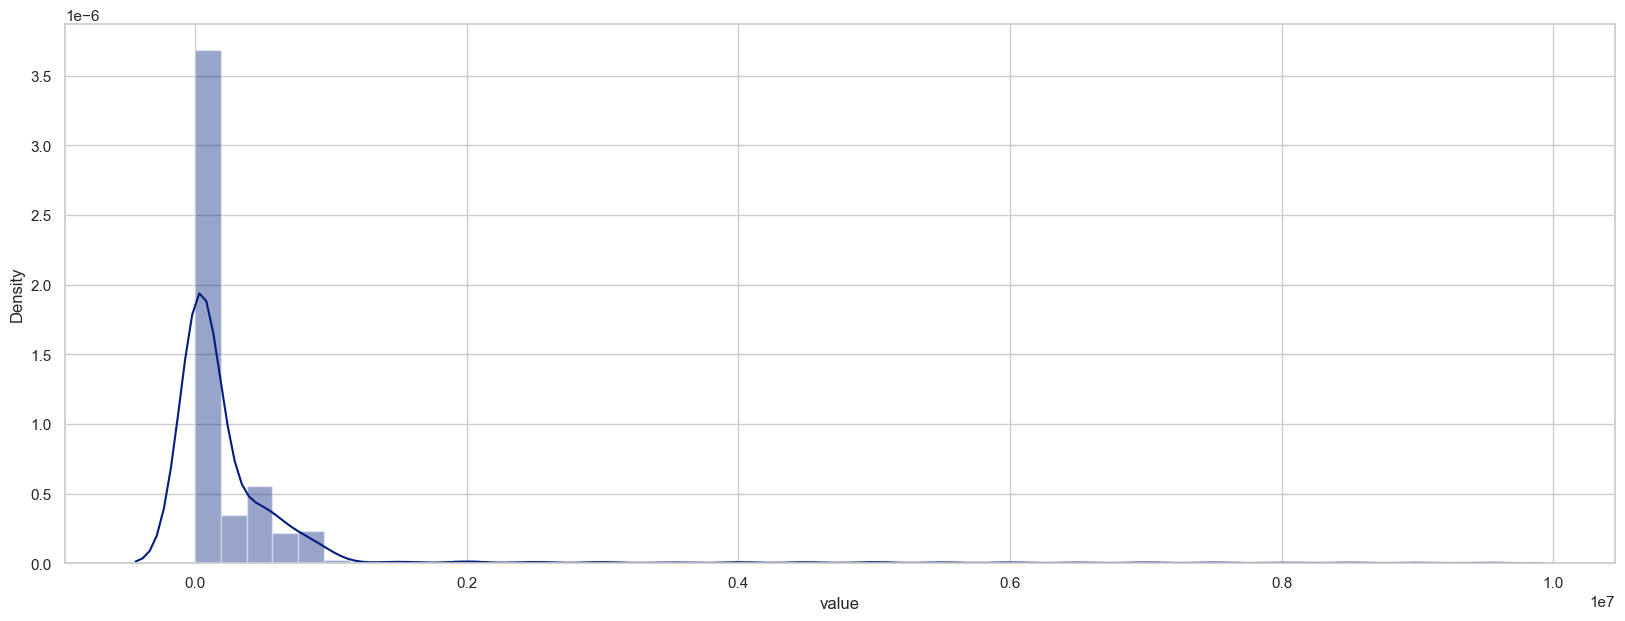

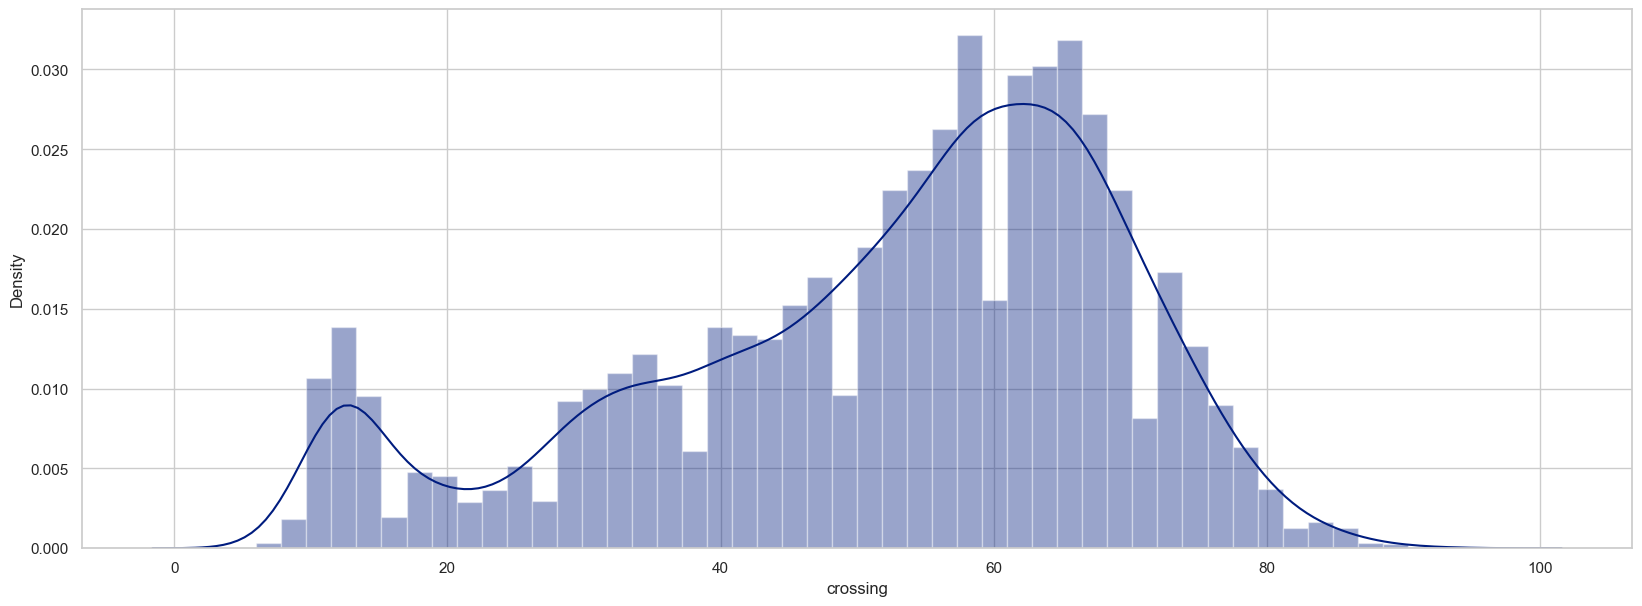

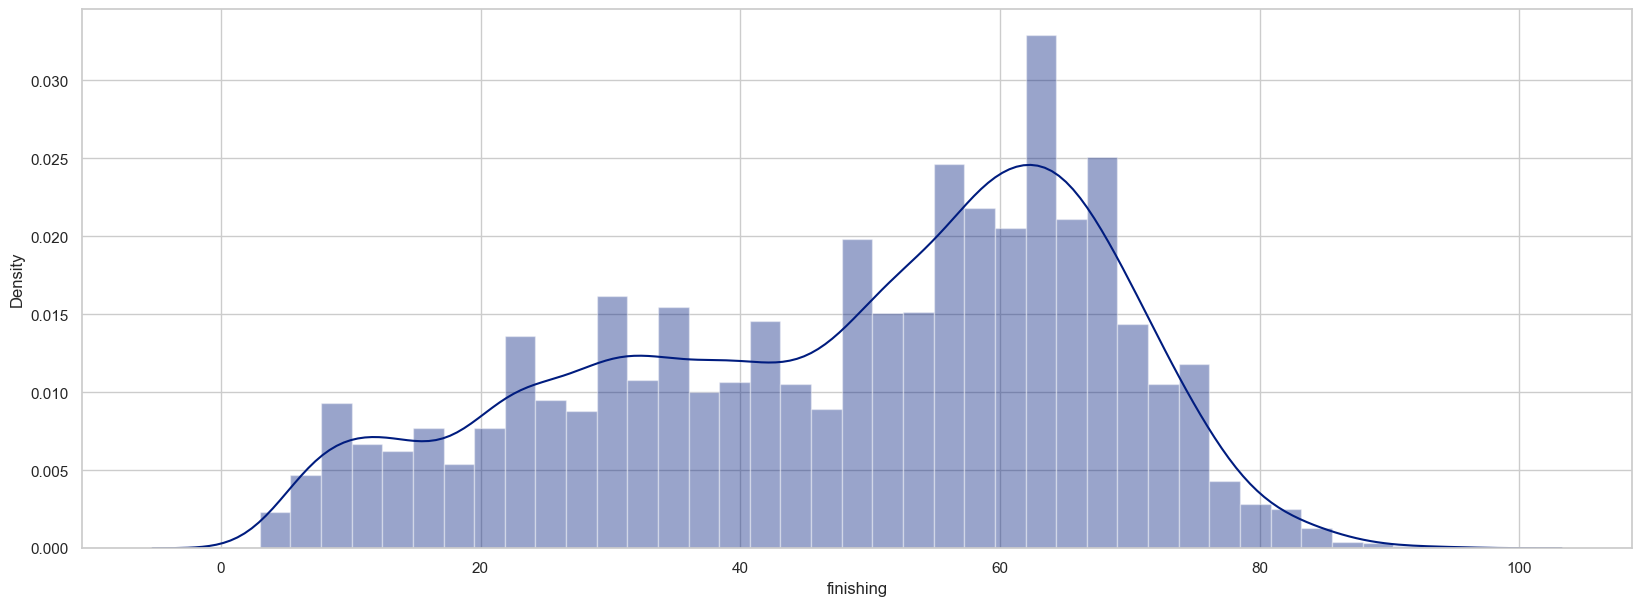

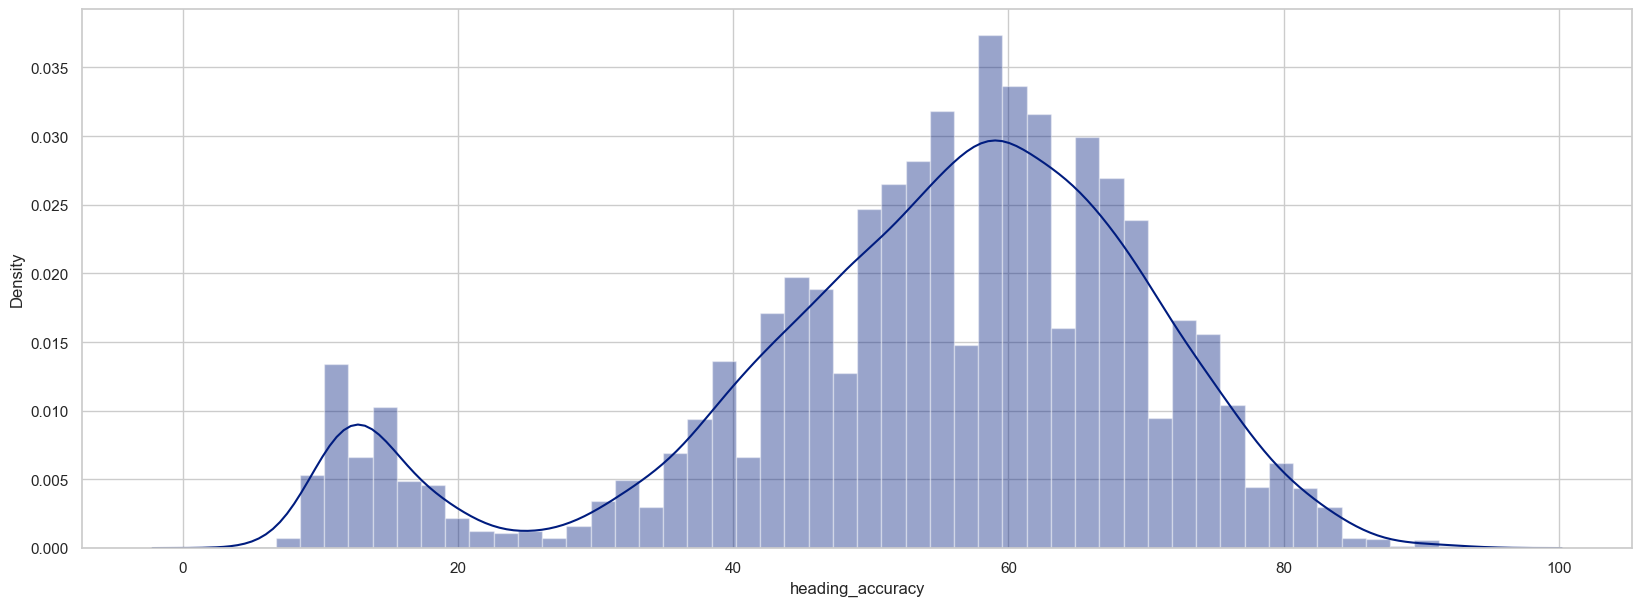

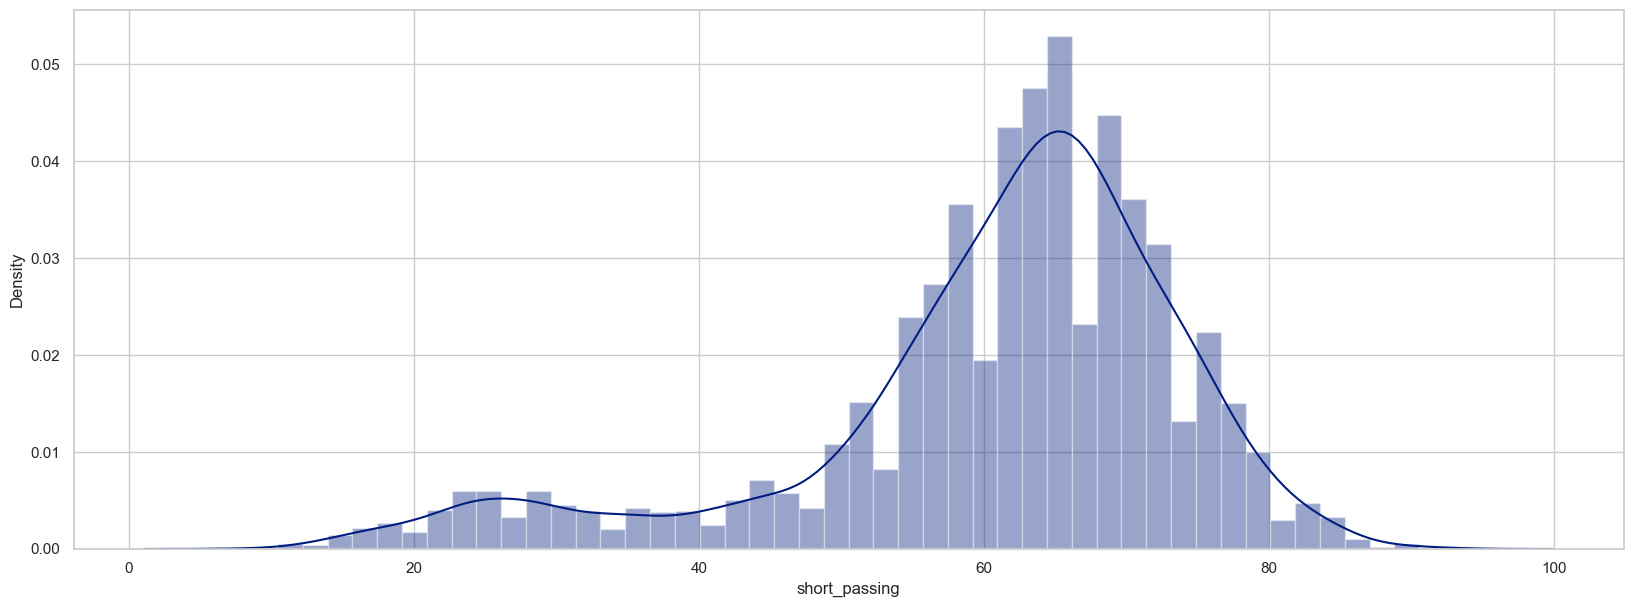

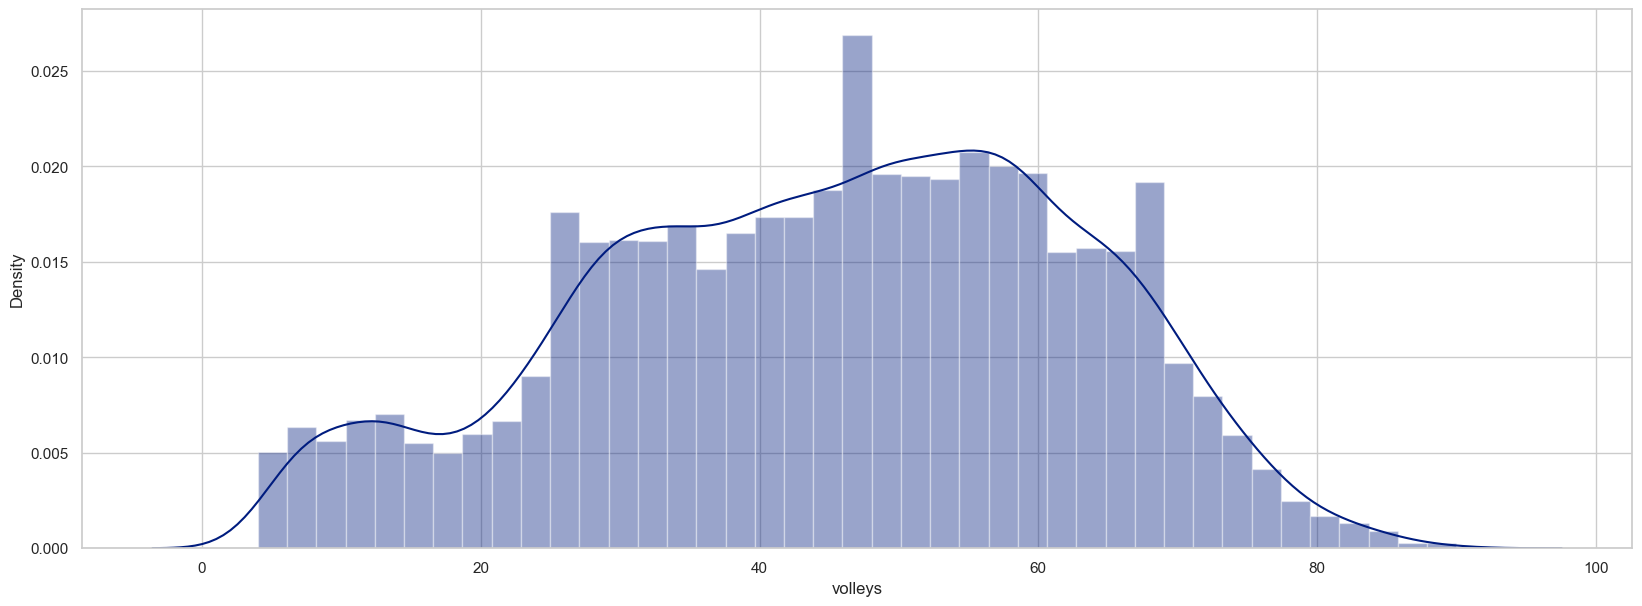

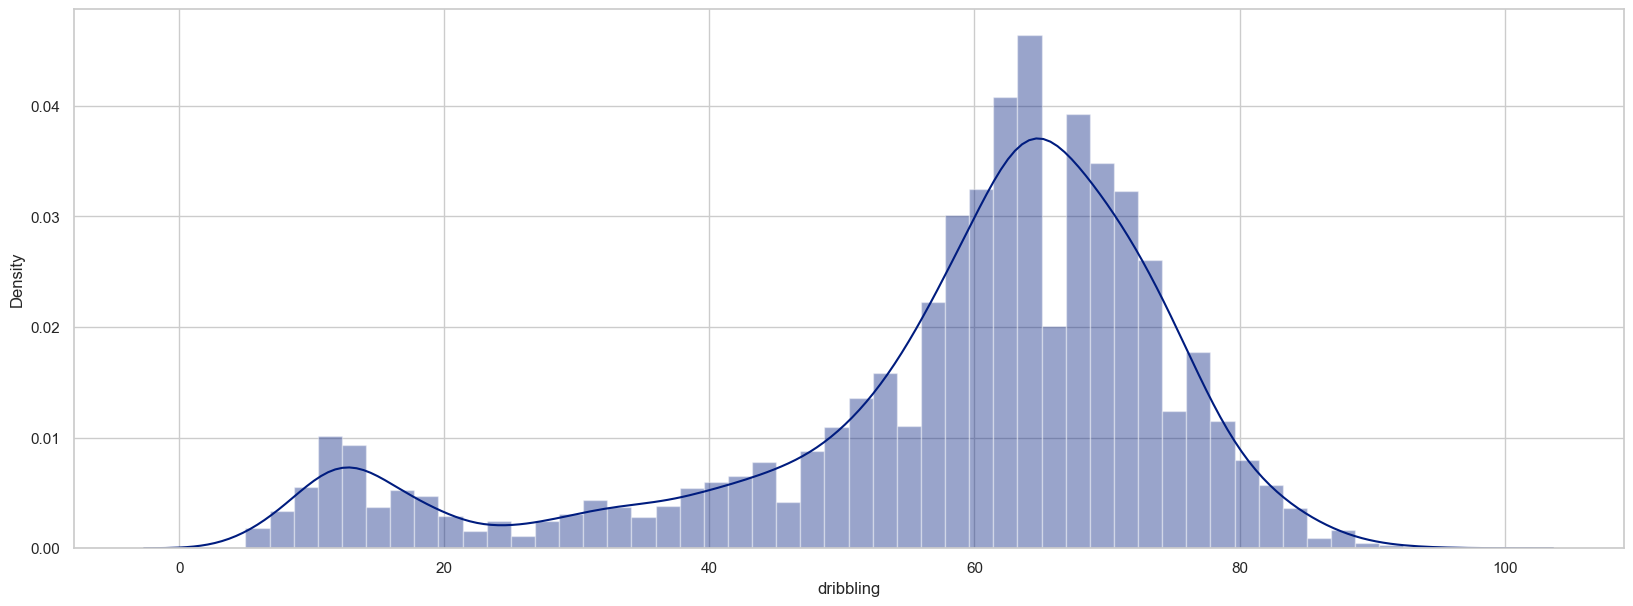

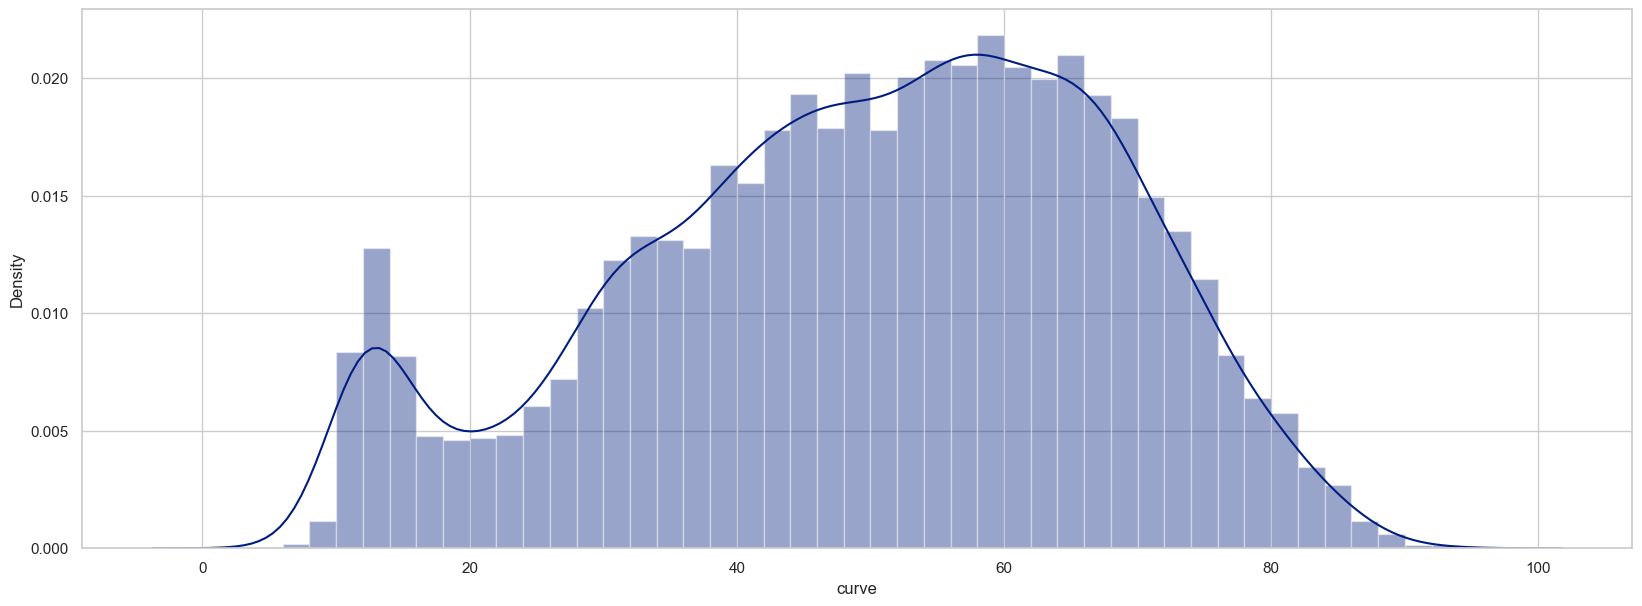

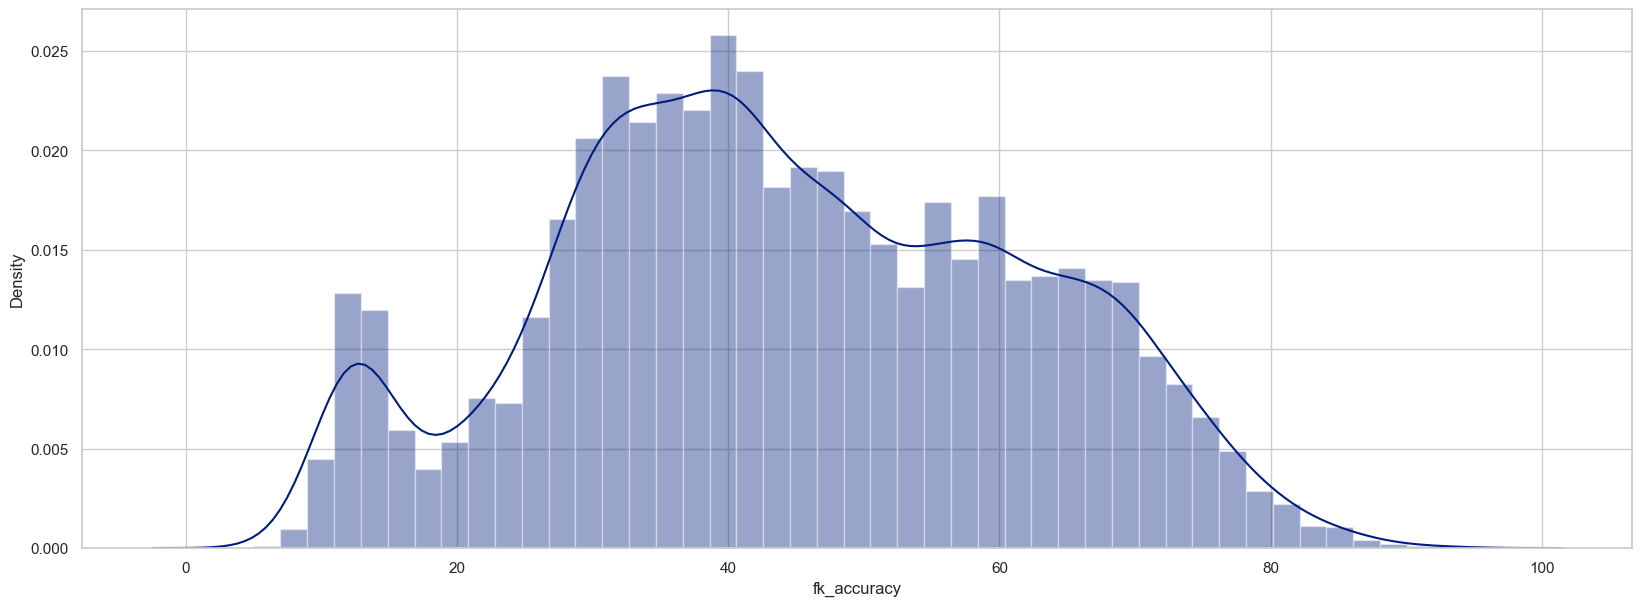

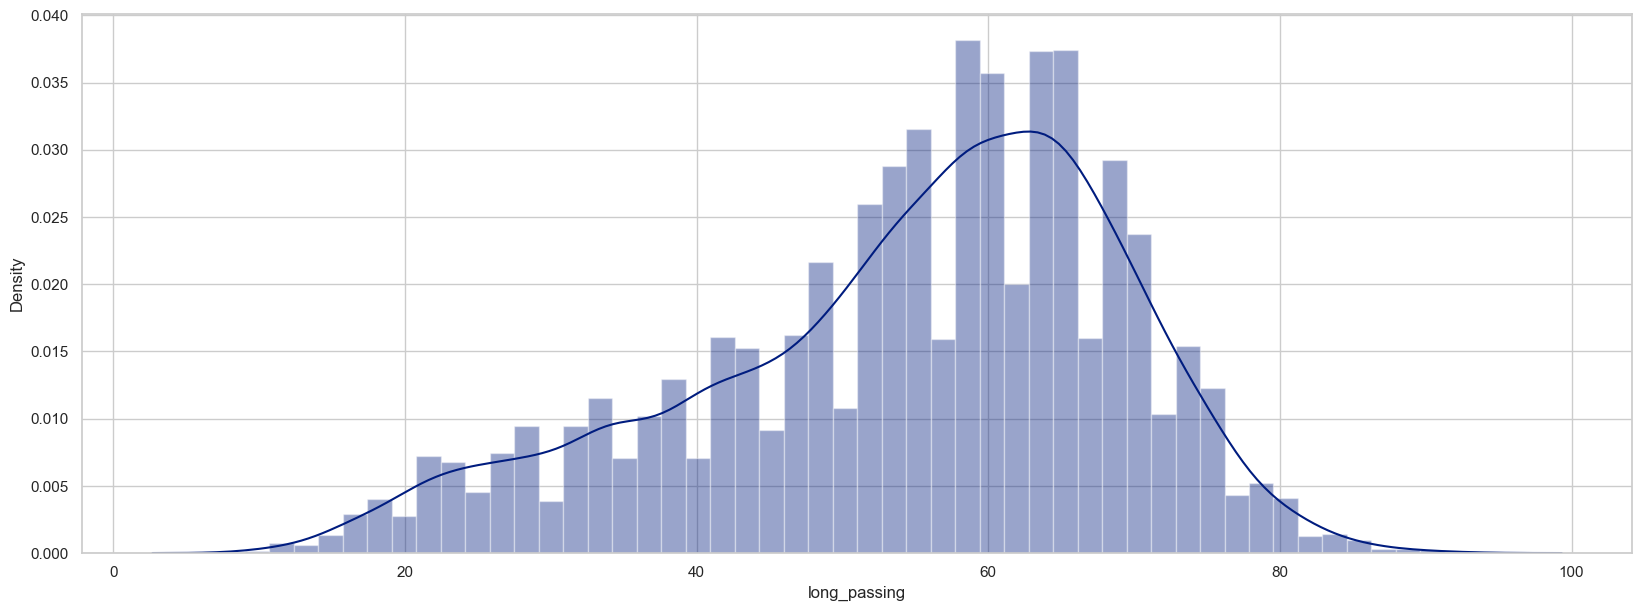

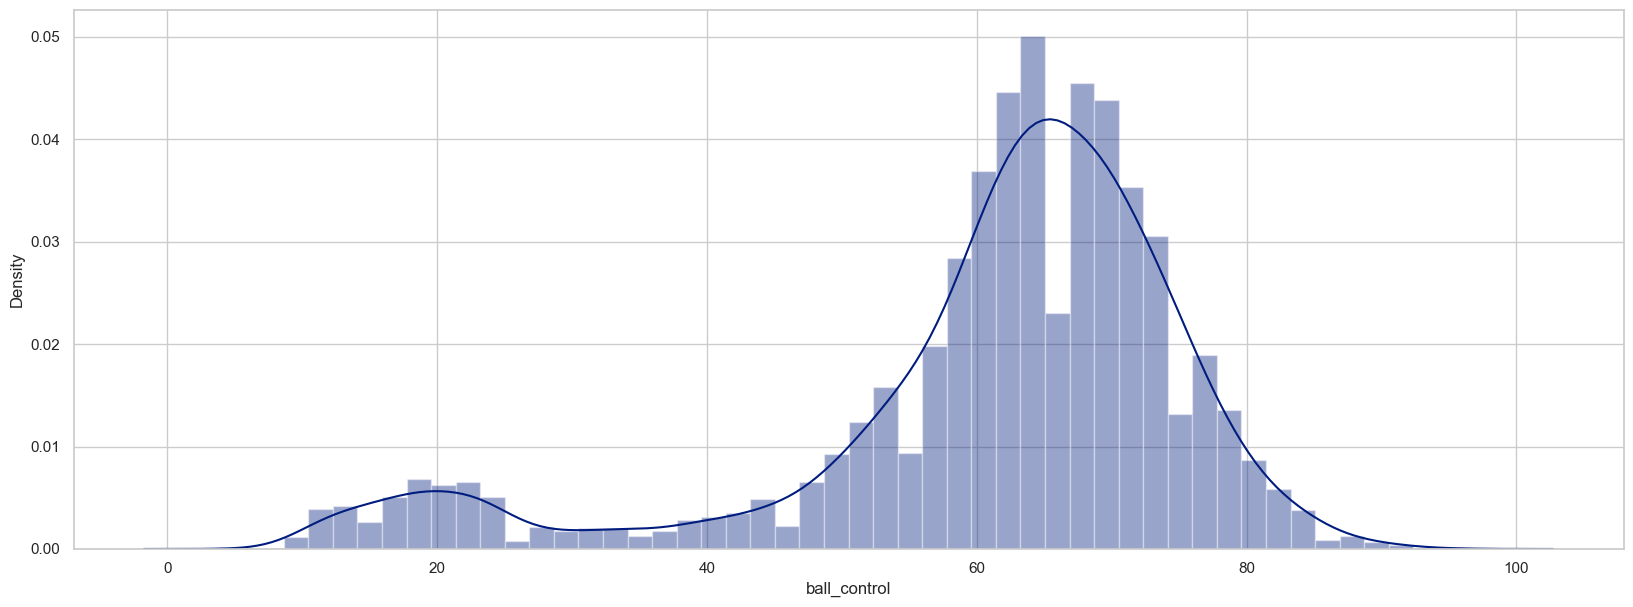

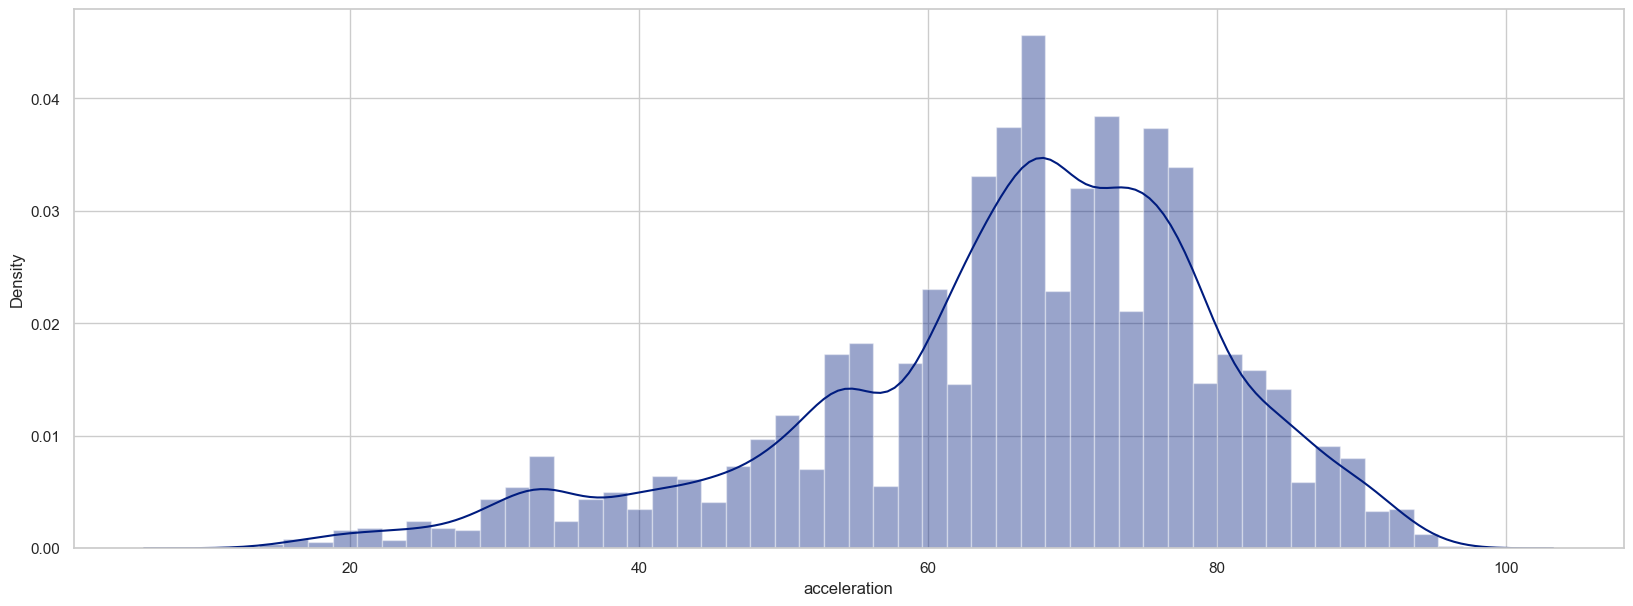

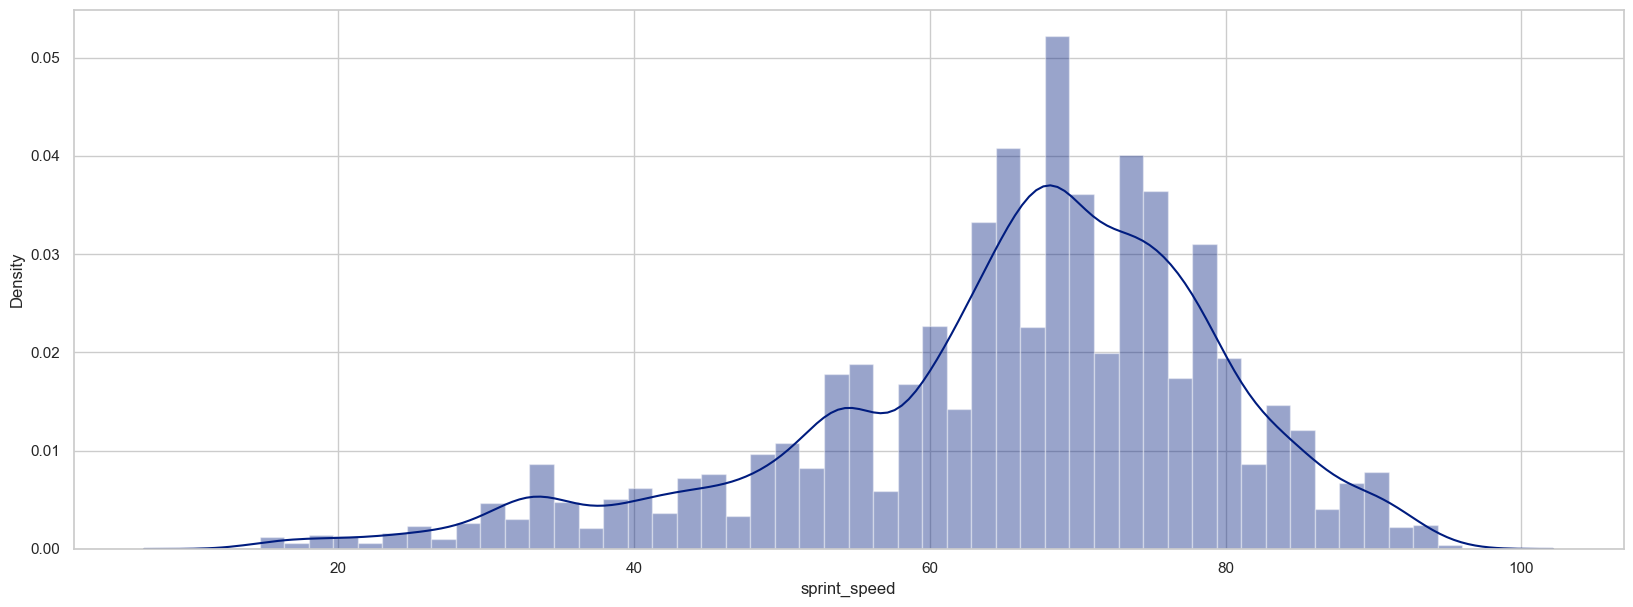

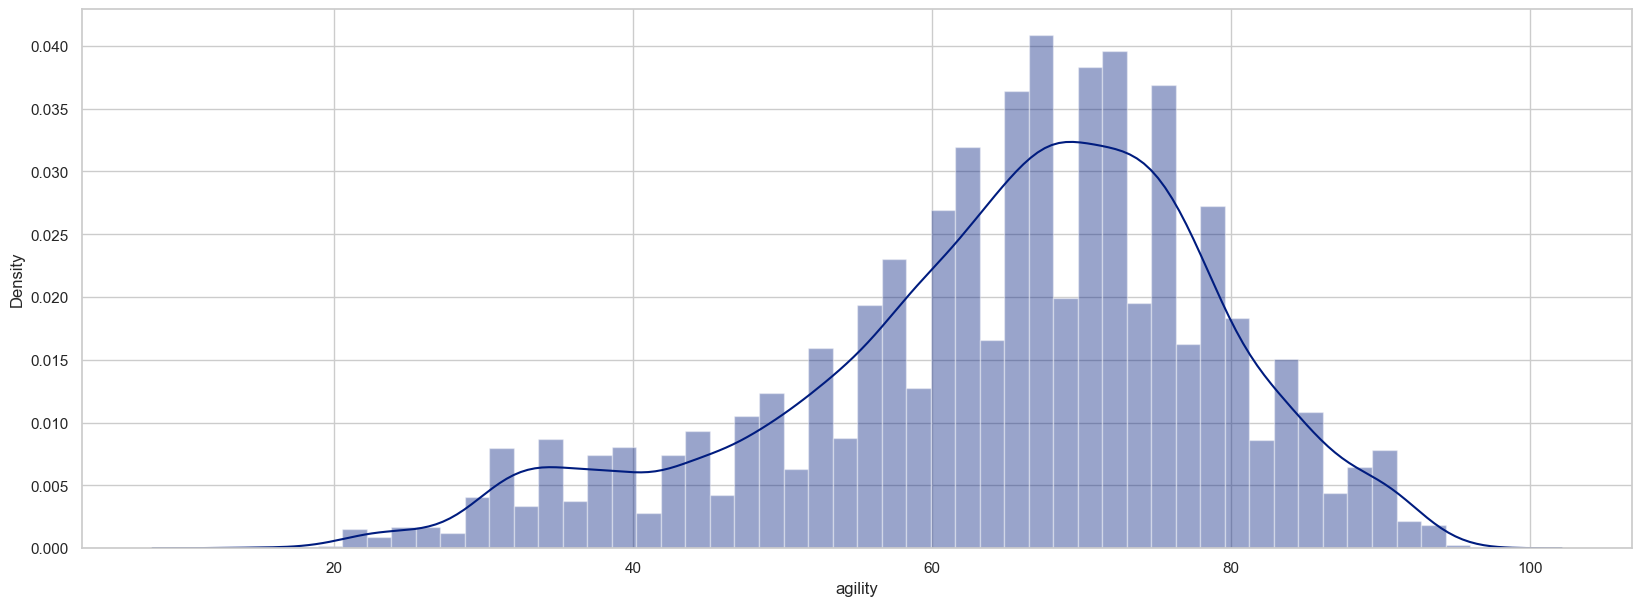

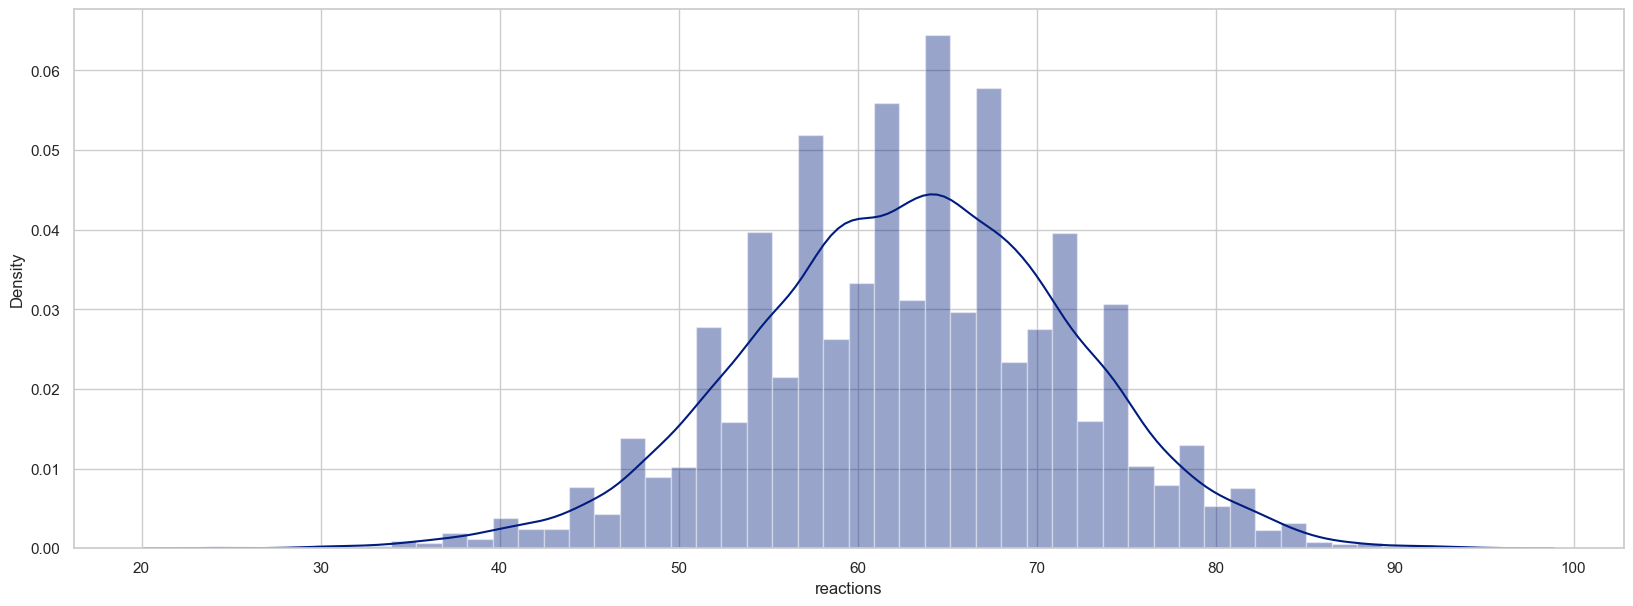

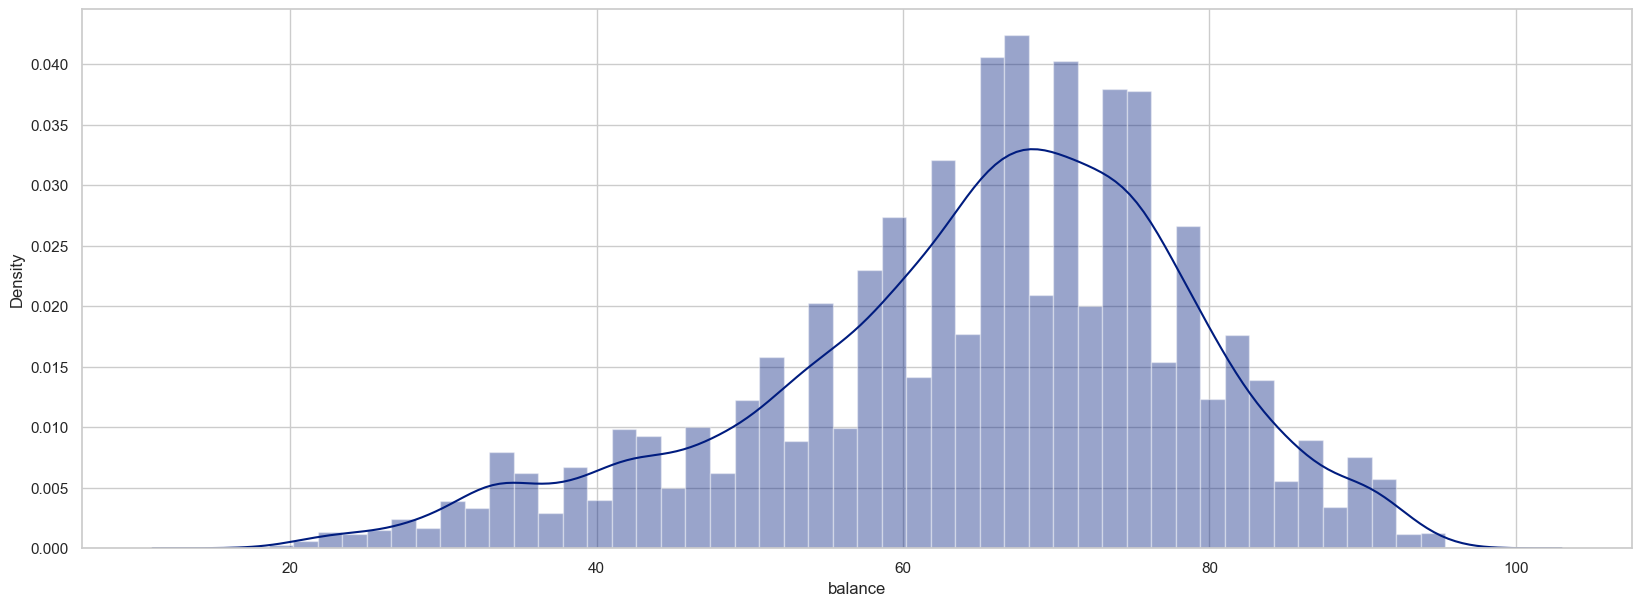

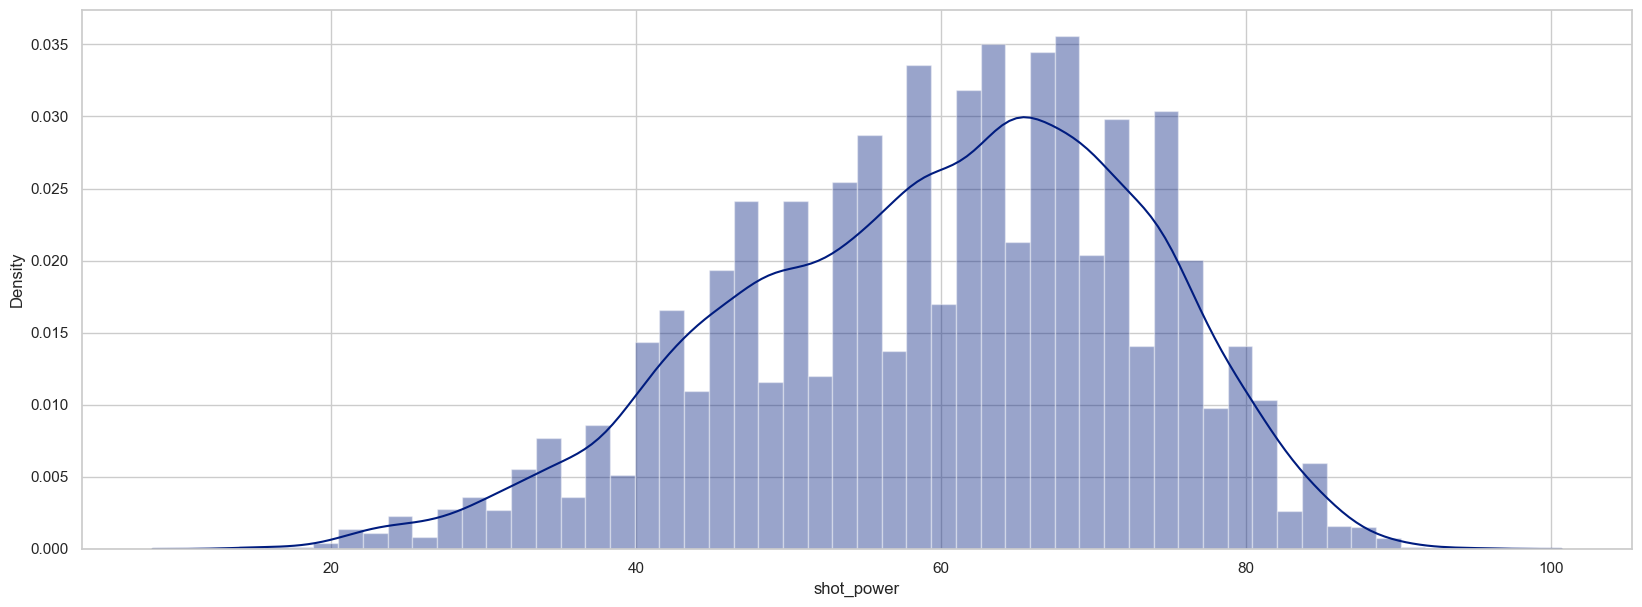

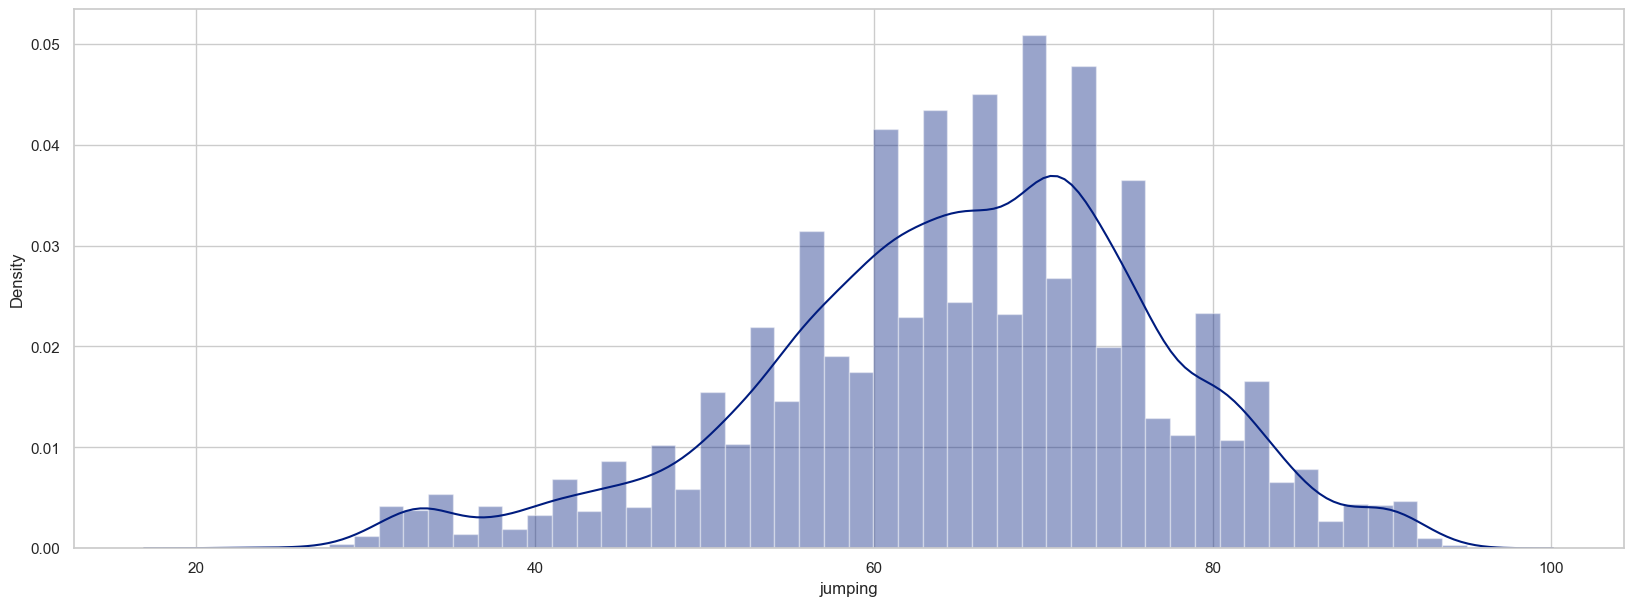

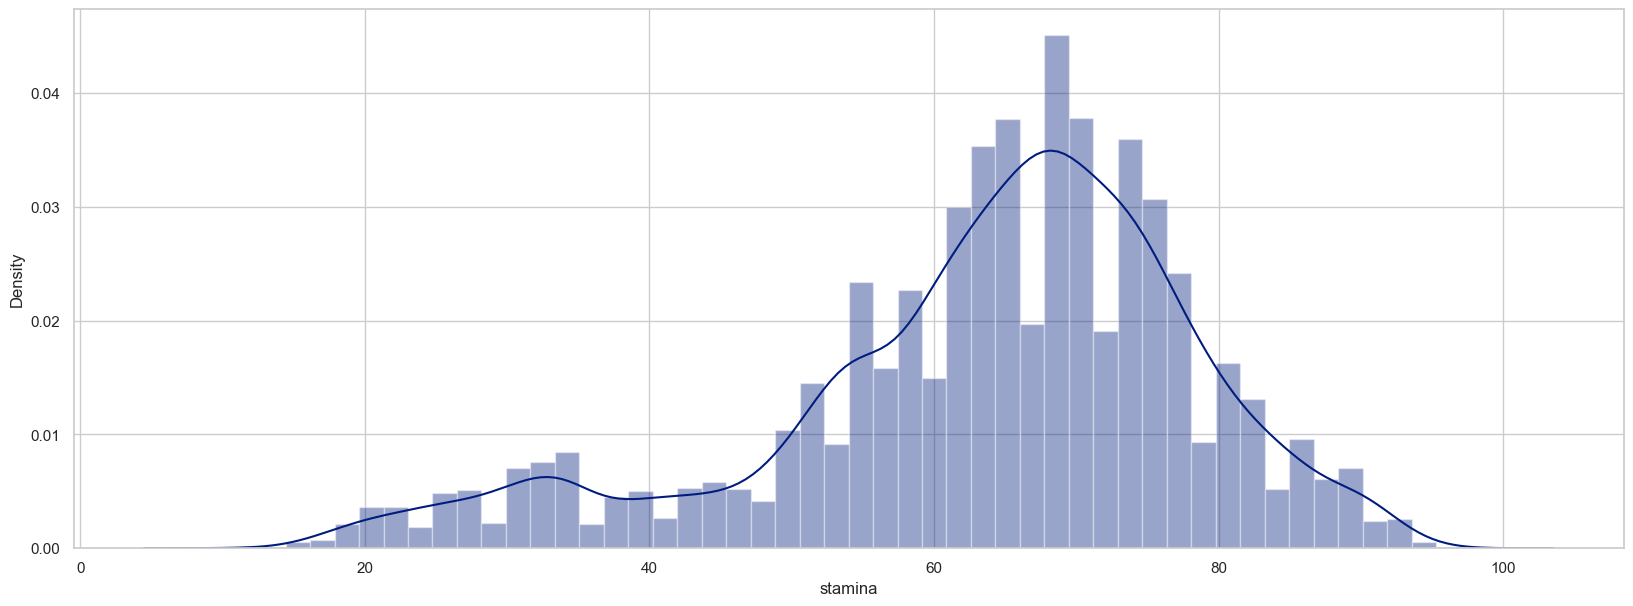

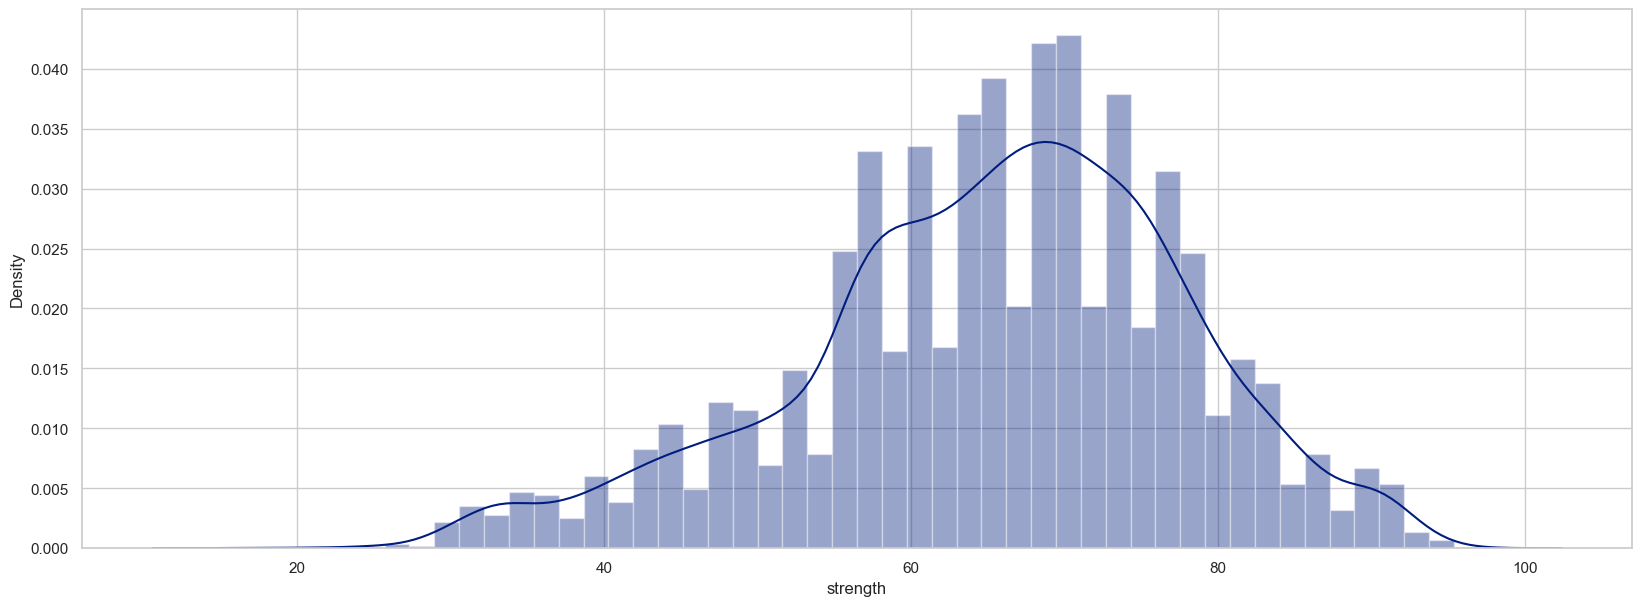

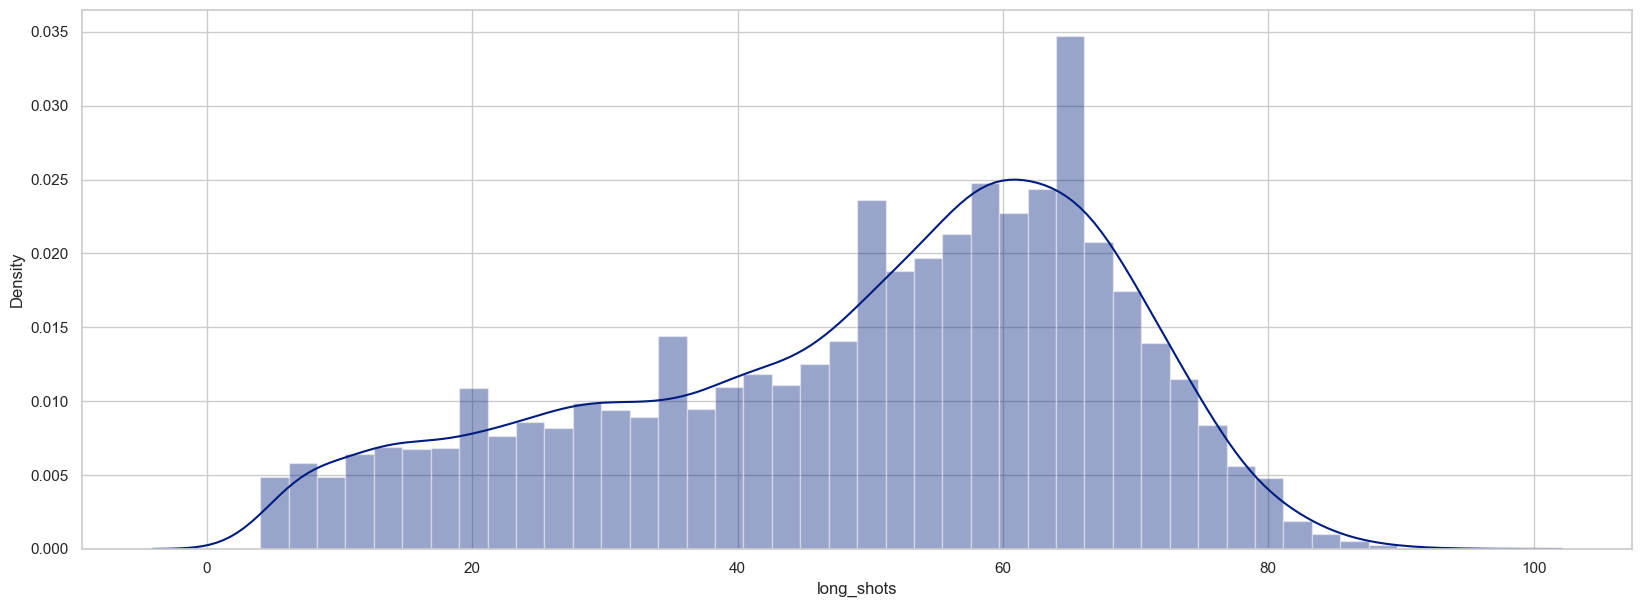

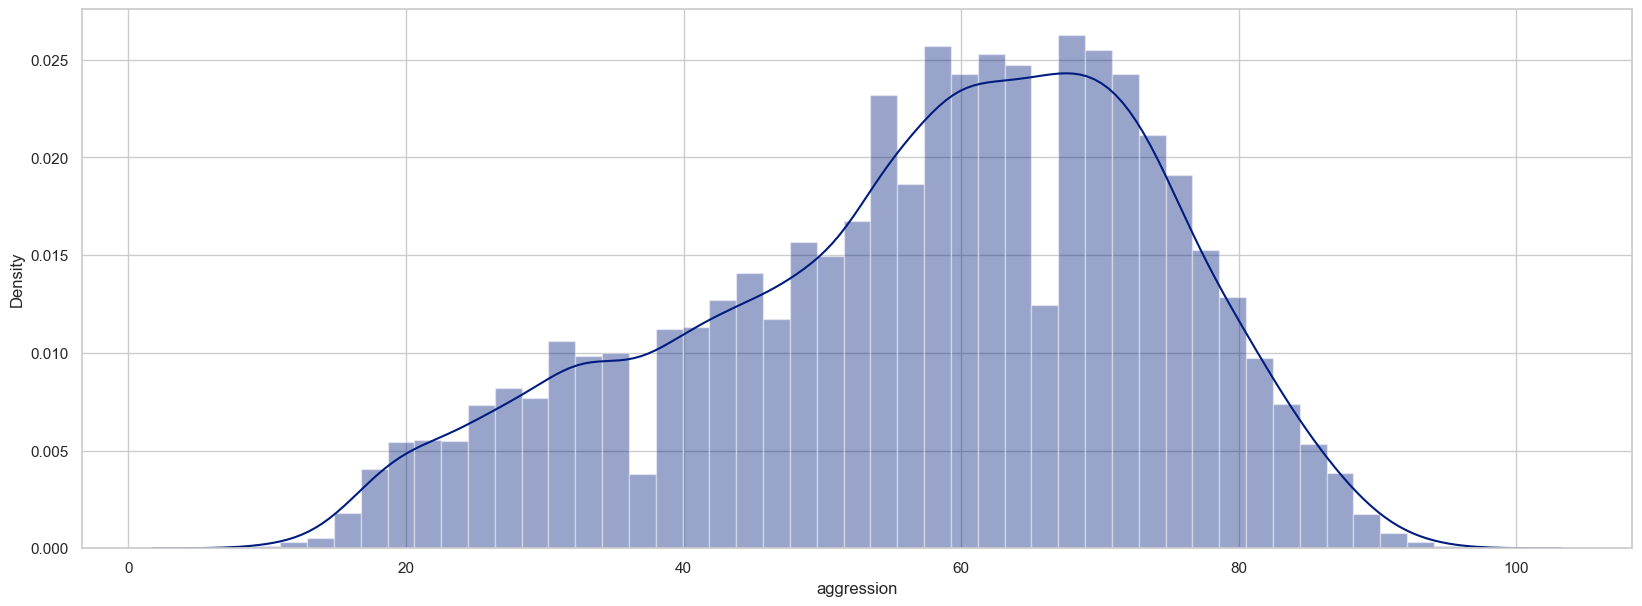

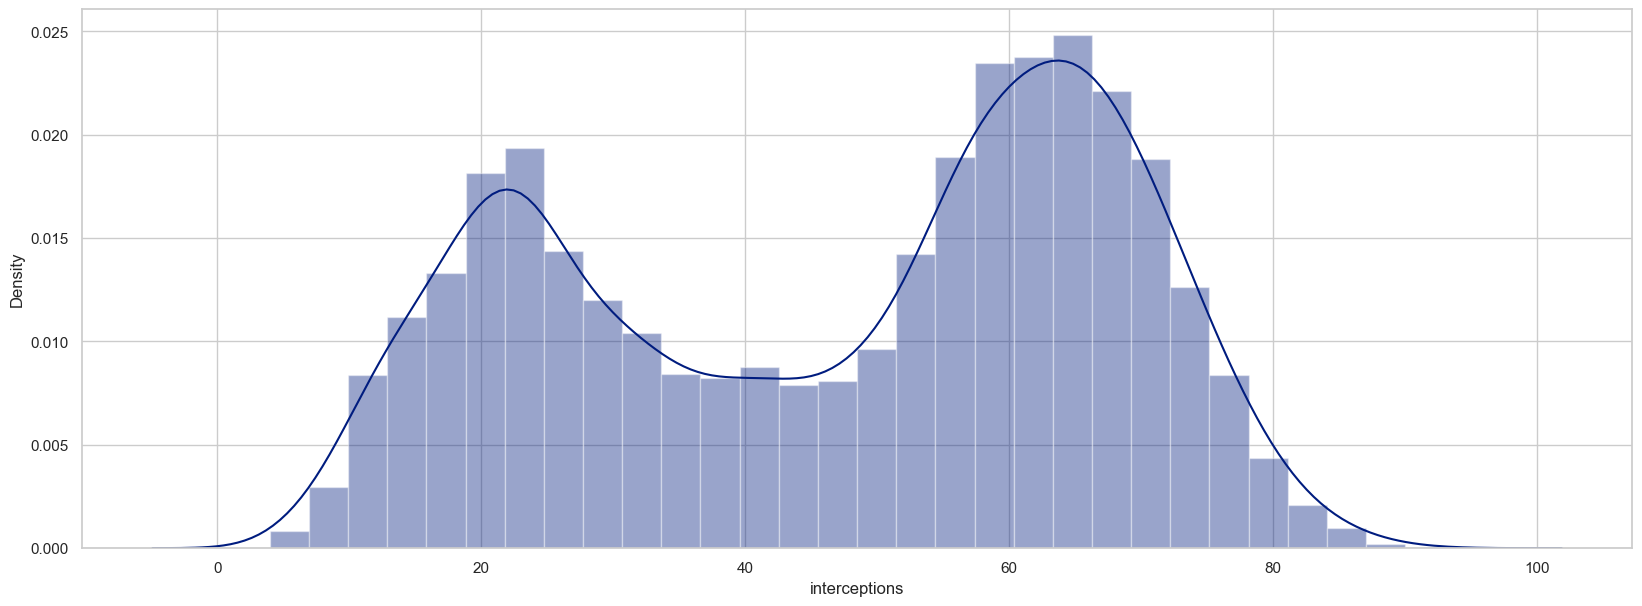

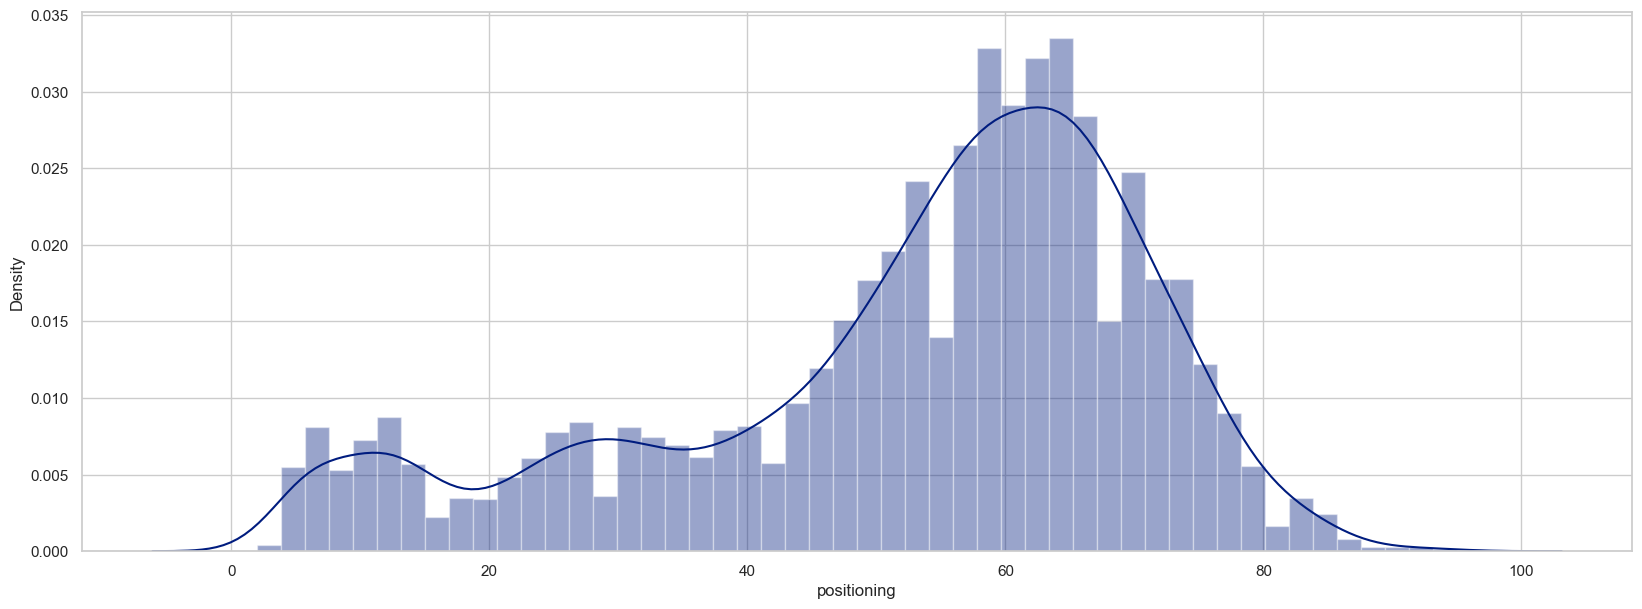

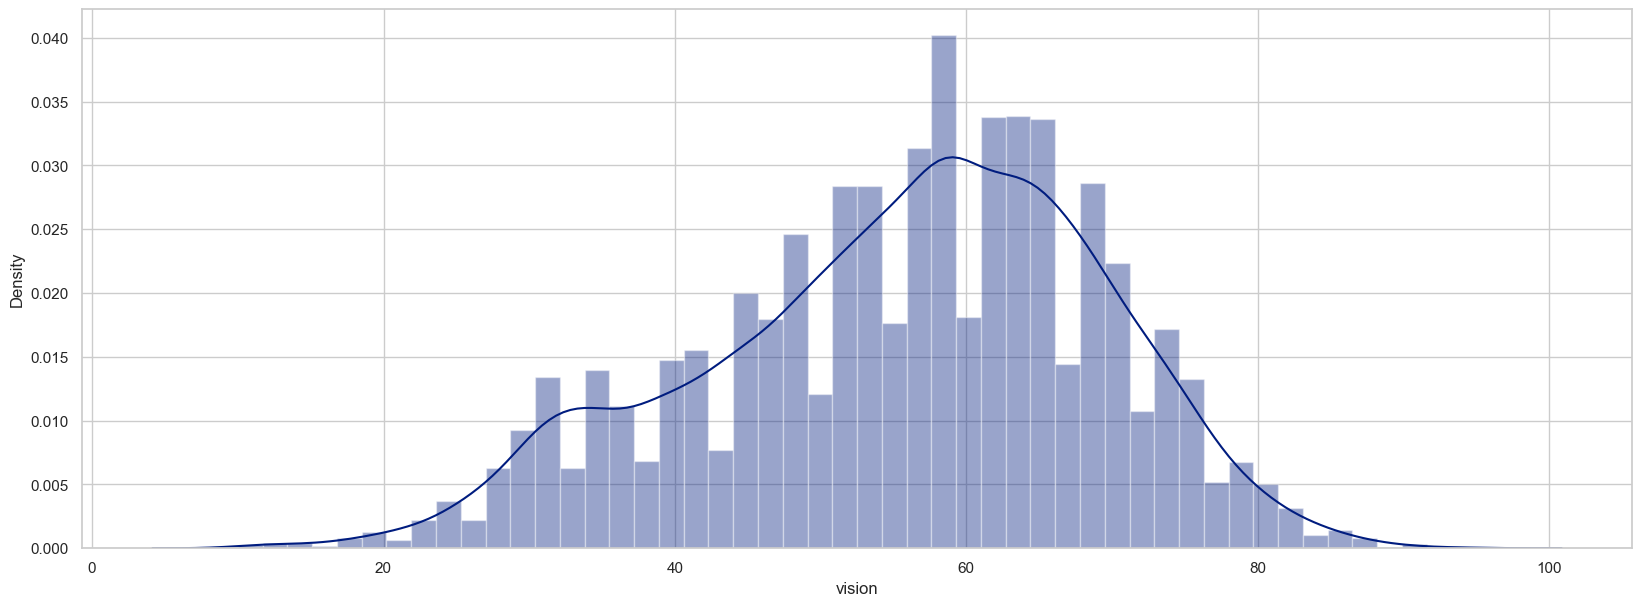

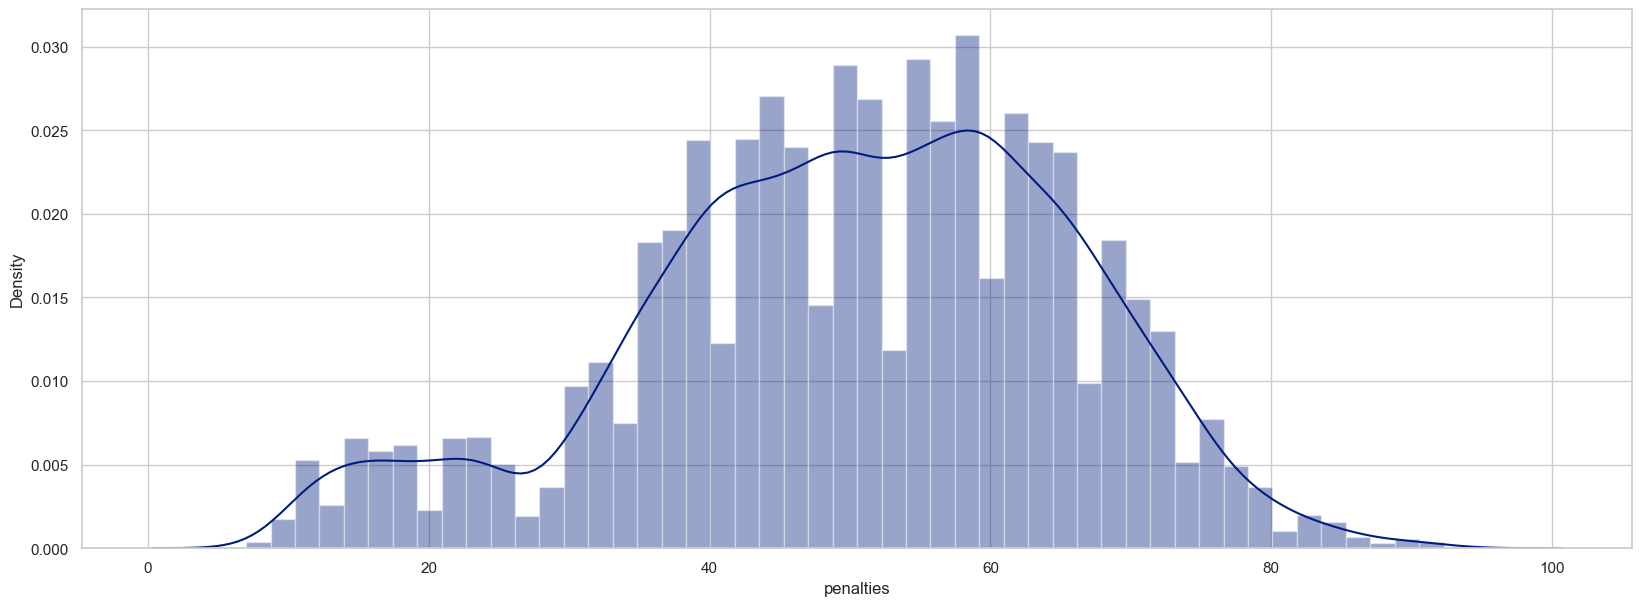

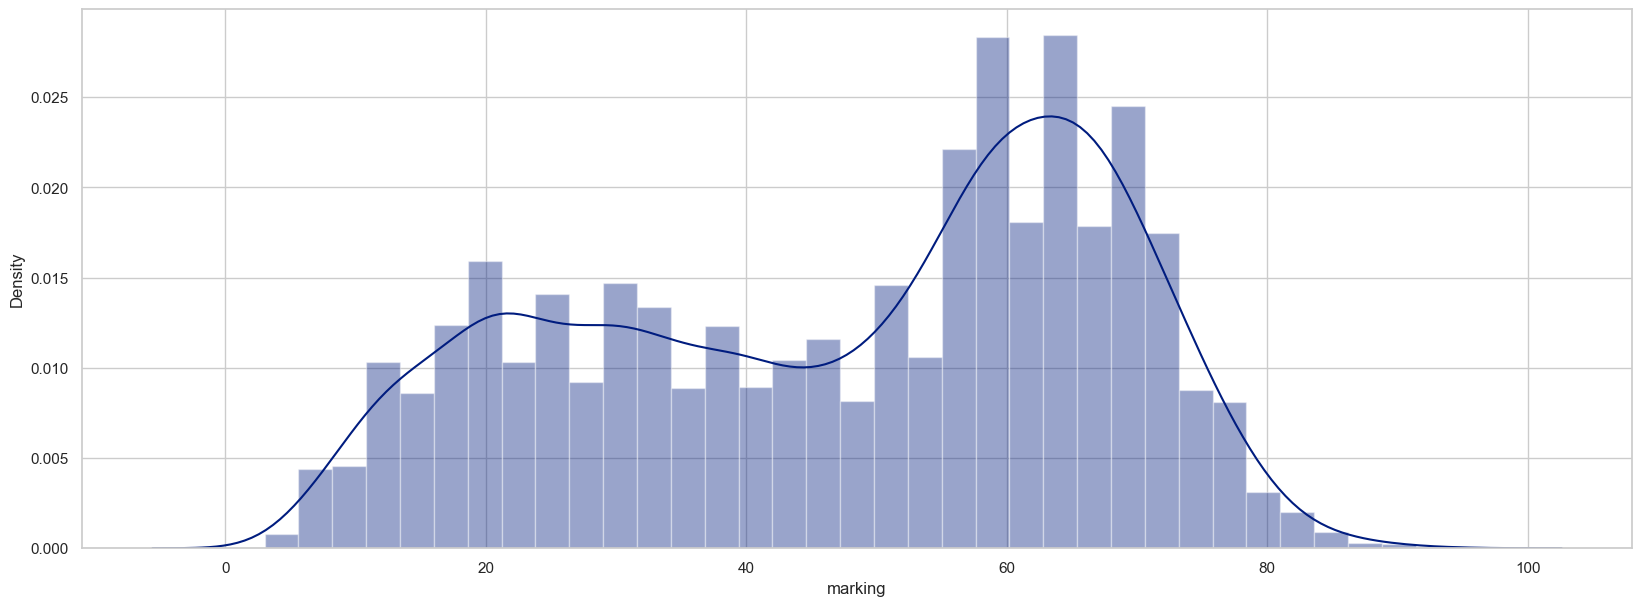

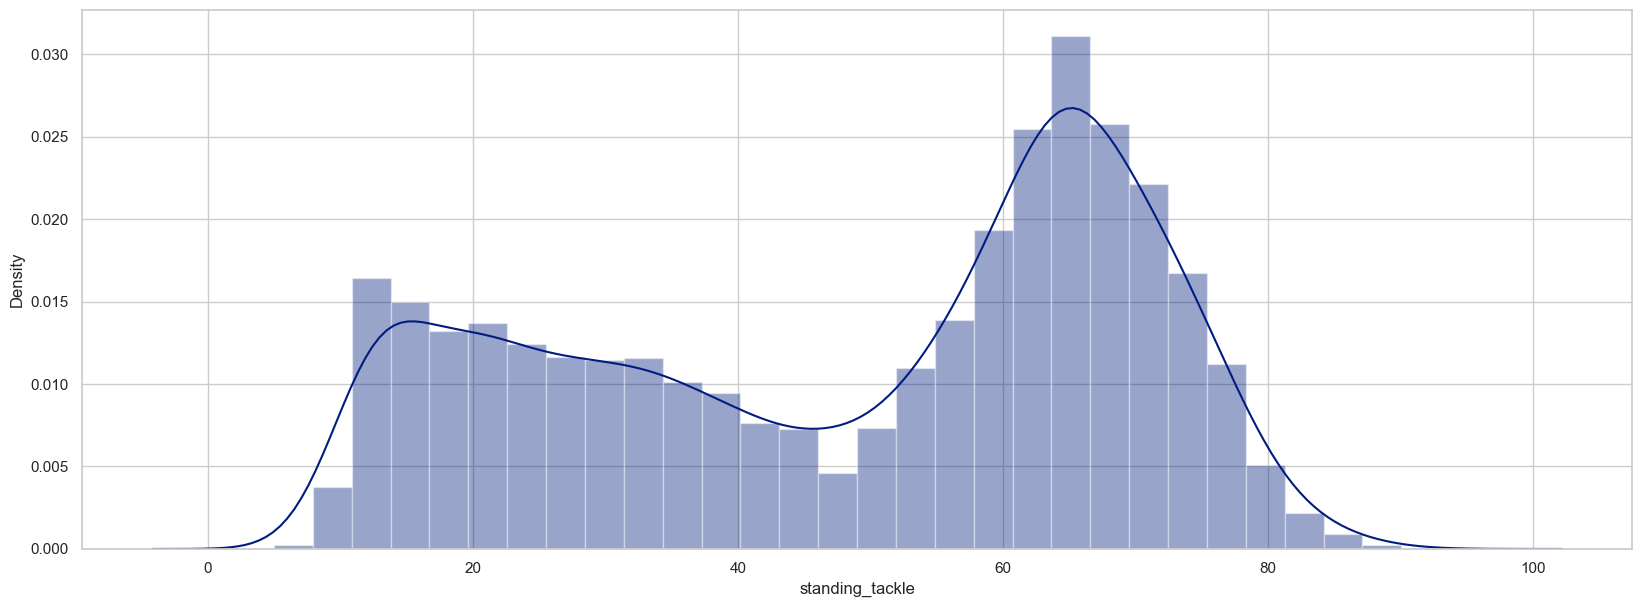

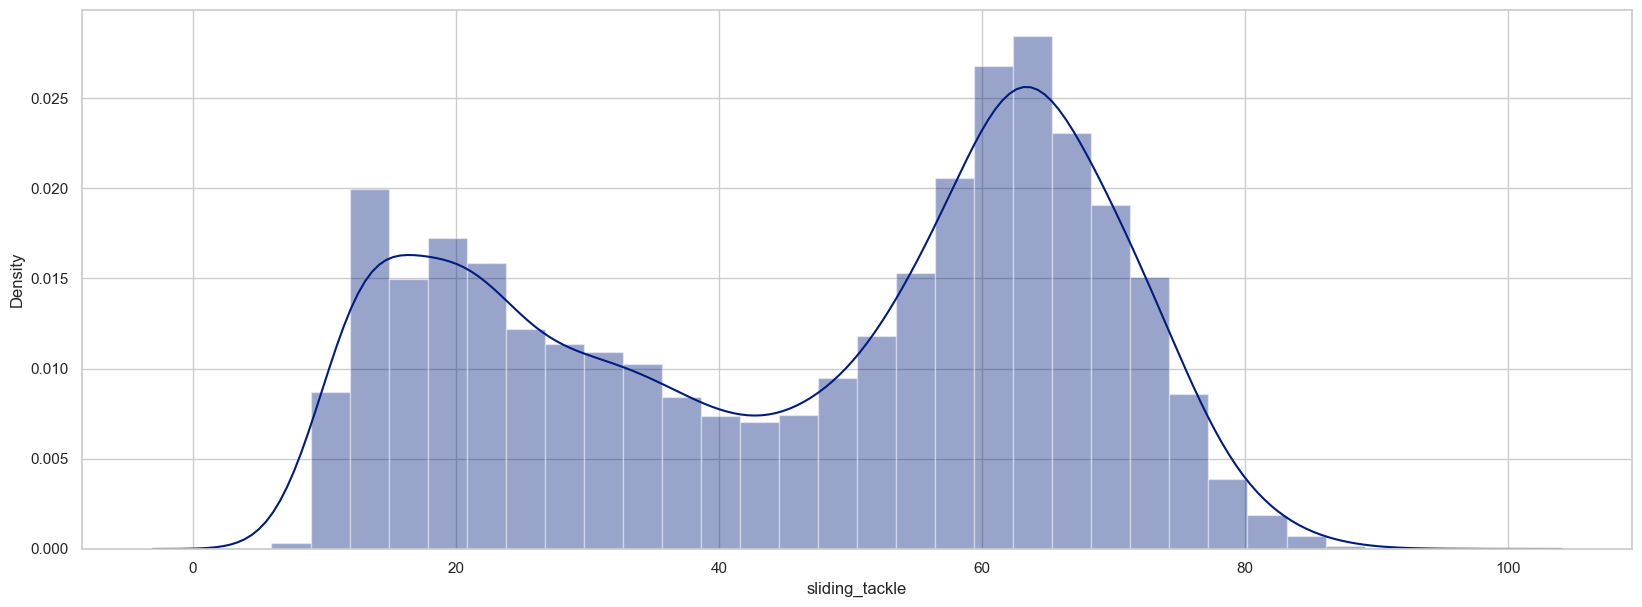

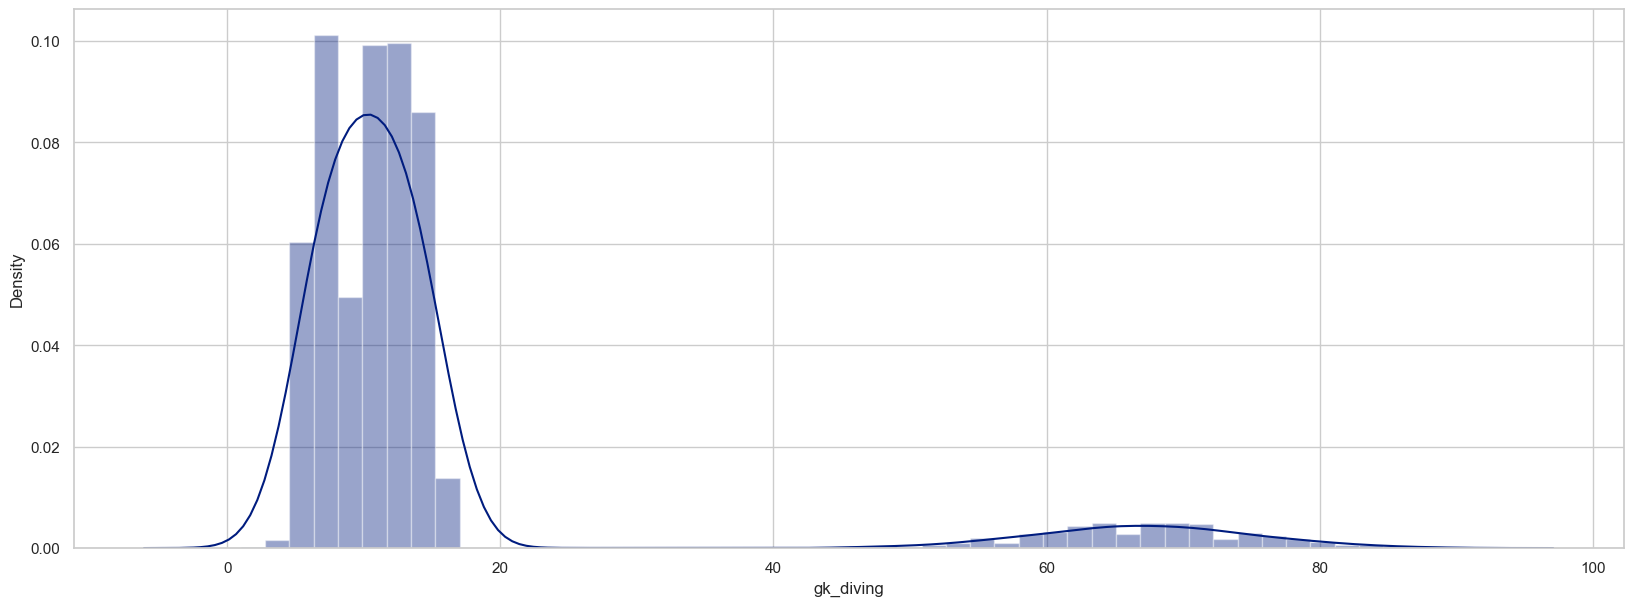

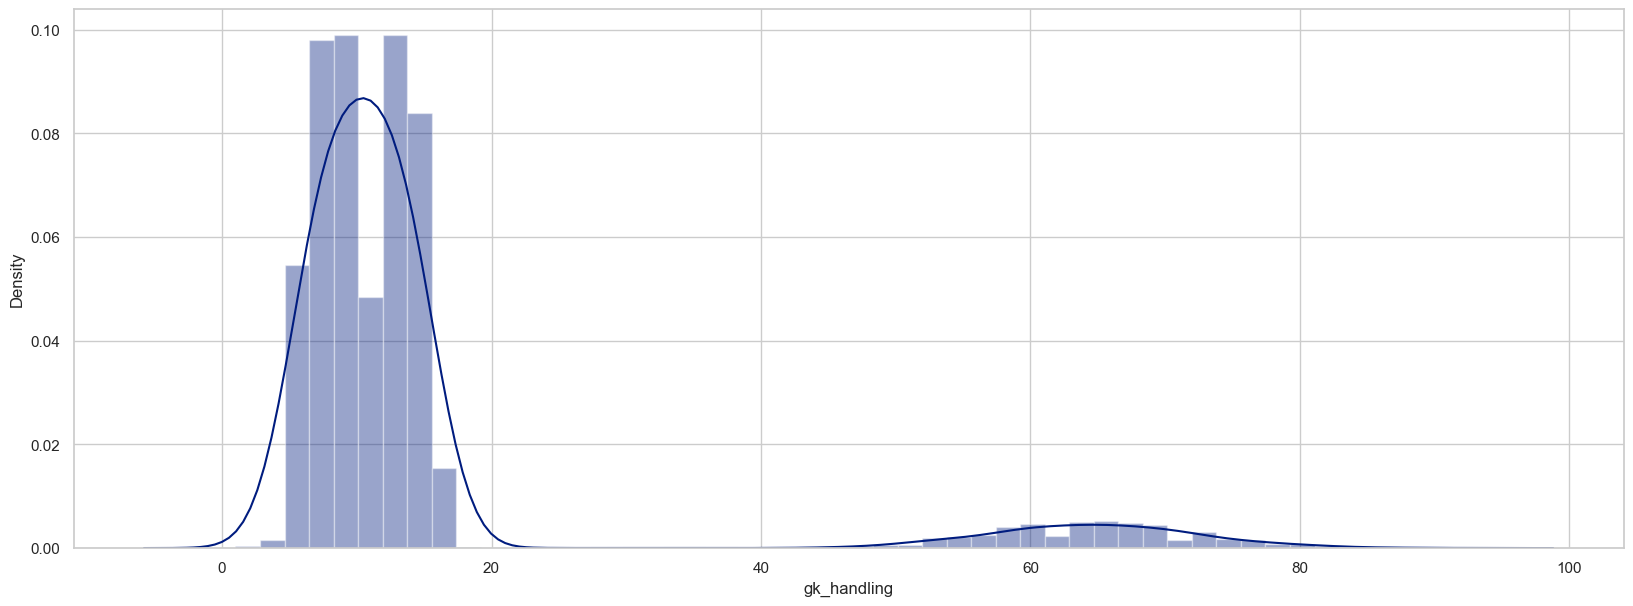

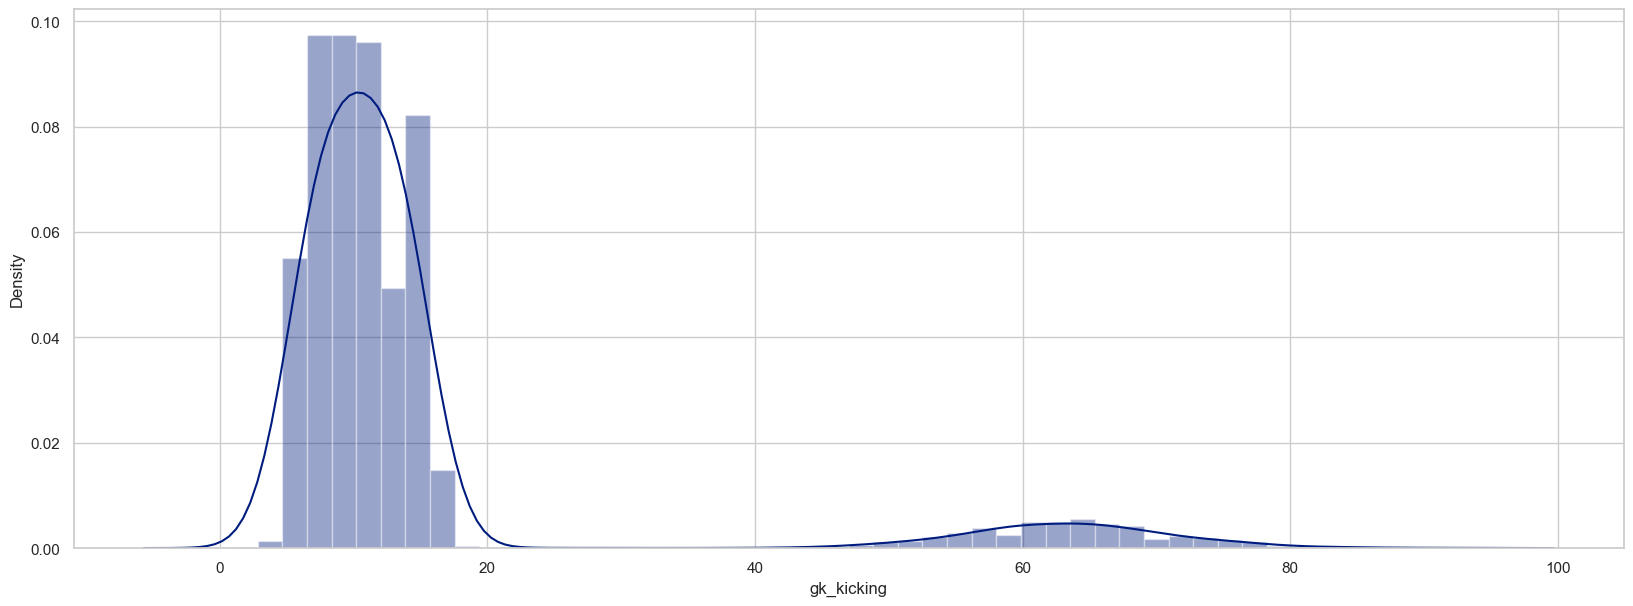

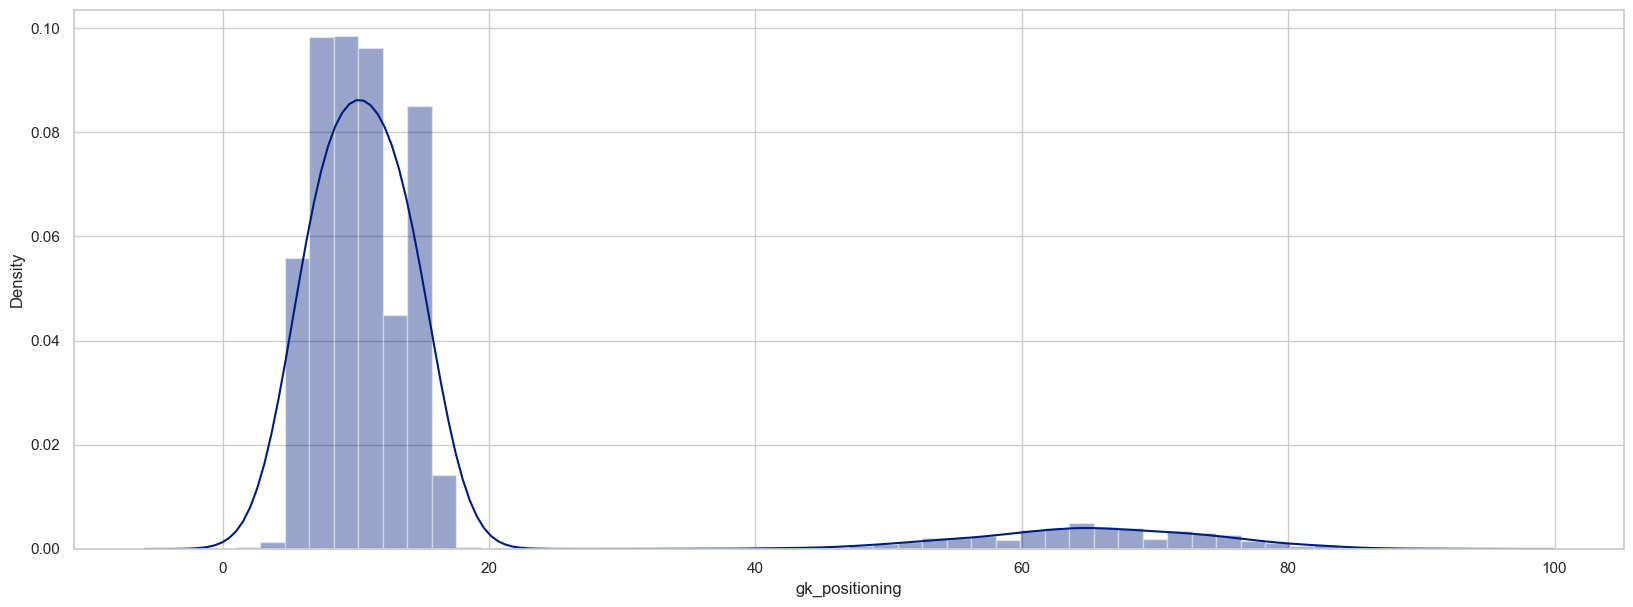

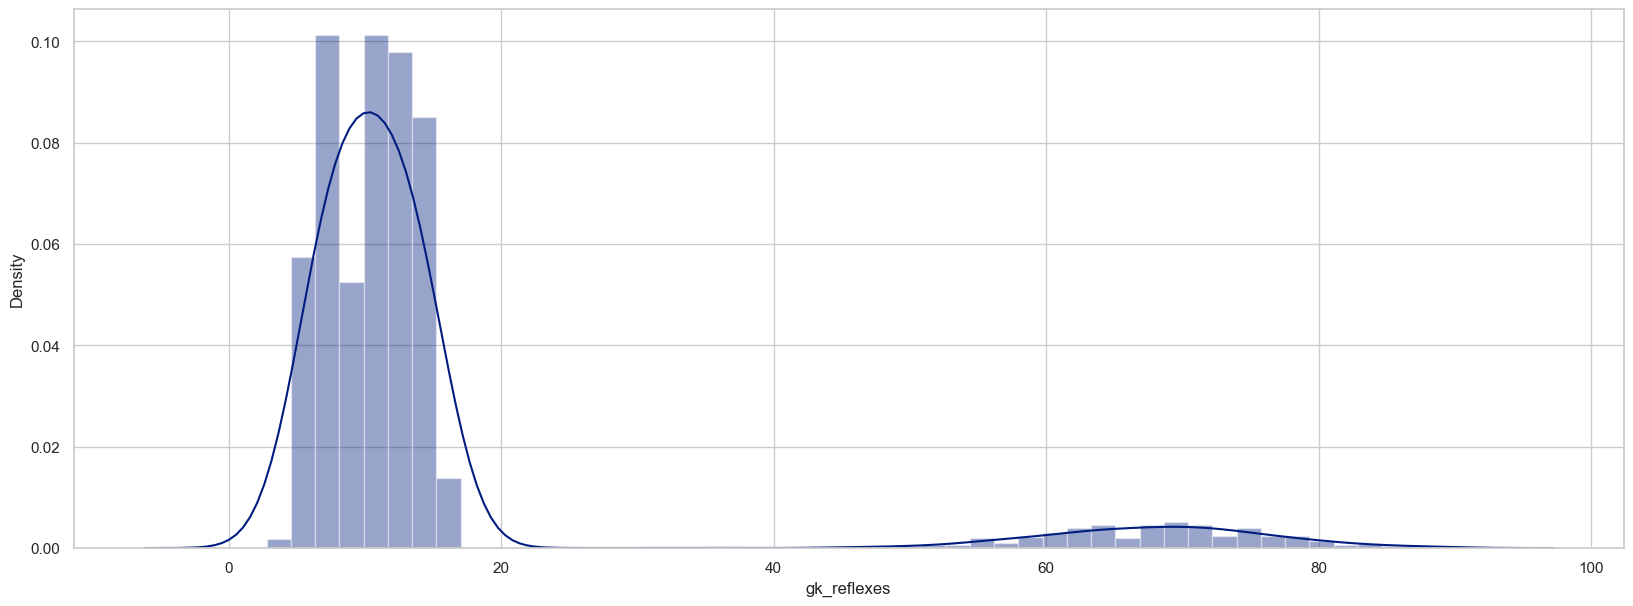

In [152]:
for column in num.columns:
    sns.distplot(dataPosition[column])
    plt.show()

#### Check correlations

In [153]:
#Correlation

correlations_matrix = num.corr(method="spearman")
correlations_matrix

age       ova       bov       pot     value  crossing  \
age               1.000000  0.559211  0.498425 -0.264669  0.135717  0.249468   
ova               0.559211  1.000000  0.984513  0.539777  0.476836  0.470196   
bov               0.498425  0.984513  1.000000  0.580602  0.483544  0.468870   
pot              -0.264669  0.539777  0.580602  1.000000  0.372651  0.227246   
value             0.135717  0.476836  0.483544  0.372651  1.000000  0.227096   
crossing          0.249468  0.470196  0.468870  0.227246  0.227096  1.000000   
finishing         0.157084  0.331195  0.355302  0.170312  0.189159  0.537867   
heading_accuracy  0.292578  0.384457  0.399432  0.142674  0.178505  0.160237   
short_passing     0.303210  0.643688  0.671764  0.389097  0.328648  0.712590   
volleys           0.236045  0.375969  0.392967  0.158123  0.194030  0.590868   
dribbling         0.155969  0.513361  0.537327  0.358674  0.285668  0.782542   
curve             0.246250  0.437348  0.446931  0.213803  0.214667  0.784135   
fk_accuracy       0.255169  0.369690  0.381266  0.145330  0.176927  0.704016   
long_passing      0.289744  0.529686  0.554642  0.290305  0.258422  0.666988   
ball_control      0.269555  0.638596  0.662302  0.400461  0.336034  0.760615   
acceleration     -0.131503  0.146029  0.168316  0.189829  0.121073  0.553440   
sprint_speed     -0.119932  0.159728  0.181658  0.189055  0.126719  0.508729   
agility           0.008440  0.239344  0.259335  0.183828  0.154231  0.624597   
reactions         0.536964  0.873058  0.870281  0.437166  0.418409  0.424228   
balance          -0.058646  0.108878  0.128008  0.132643  0.078966  0.556018   
shot_power        0.360855  0.555524  0.565505  0.246235  0.276155  0.549411   
jumping           0.254635  0.285666  0.286163  0.062766  0.134699  0.061915   
stamina           0.197949  0.406454  0.426647  0.168928  0.215165  0.517390   
strength          0.377411  0.338130  0.336745  0.016352  0.139453 -0.093226   
long_shots        0.274976  0.453016  0.472029  0.196725  0.229727  0.655143   
aggression        0.341924  0.422843  0.431449  0.137151  0.177974  0.323415   
interceptions     0.250516  0.360519  0.371375  0.158840  0.150331  0.337383   
positioning       0.234751  0.450165  0.466940  0.218013  0.238448  0.671311   
vision            0.281113  0.528373  0.547782  0.291022  0.267715  0.679339   
penalties         0.238706  0.328083  0.340358  0.124633  0.162538  0.515112   
marking           0.217696  0.336012  0.350005  0.159225  0.143001  0.323473   
standing_tackle   0.174771  0.310400  0.325639  0.171945  0.136171  0.318843   
sliding_tackle    0.151546  0.277210  0.290507  0.157907  0.116602  0.316995   
gk_diving         0.099187  0.041469  0.013962 -0.027560 -0.004702 -0.219221   
gk_handling       0.092302  0.037322  0.011291 -0.026520  0.000356 -0.221791   
gk_kicking        0.102706  0.043081  0.017606 -0.038166 -0.003932 -0.220172   
gk_positioning    0.098336  0.038357  0.014212 -0.028689 -0.009855 -0.229924   
gk_reflexes       0.096556  0.028405  0.003186 -0.046200 -0.003558 -0.233686   

                  finishing  heading_accuracy  short_passing   volleys  \
age                0.157084          0.292578       0.303210  0.236045   
ova                0.331195          0.384457       0.643688  0.375969   
bov                0.355302          0.399432       0.671764  0.392967   
pot                0.170312          0.142674       0.389097  0.158123   
value              0.189159          0.178505       0.328648  0.194030   
crossing           0.537867          0.160237       0.712590  0.590868   
finishing          1.000000          0.272470       0.517288  0.871169   
heading_accuracy   0.272470          1.000000       0.369904  0.301363   
short_passing      0.517288          0.369904       1.000000  0.579050   
volleys            0.871169          0.301363       0.579050  1.000000   
dribbling          0.763357          0.178190       0.732408  0.757613   
curve         

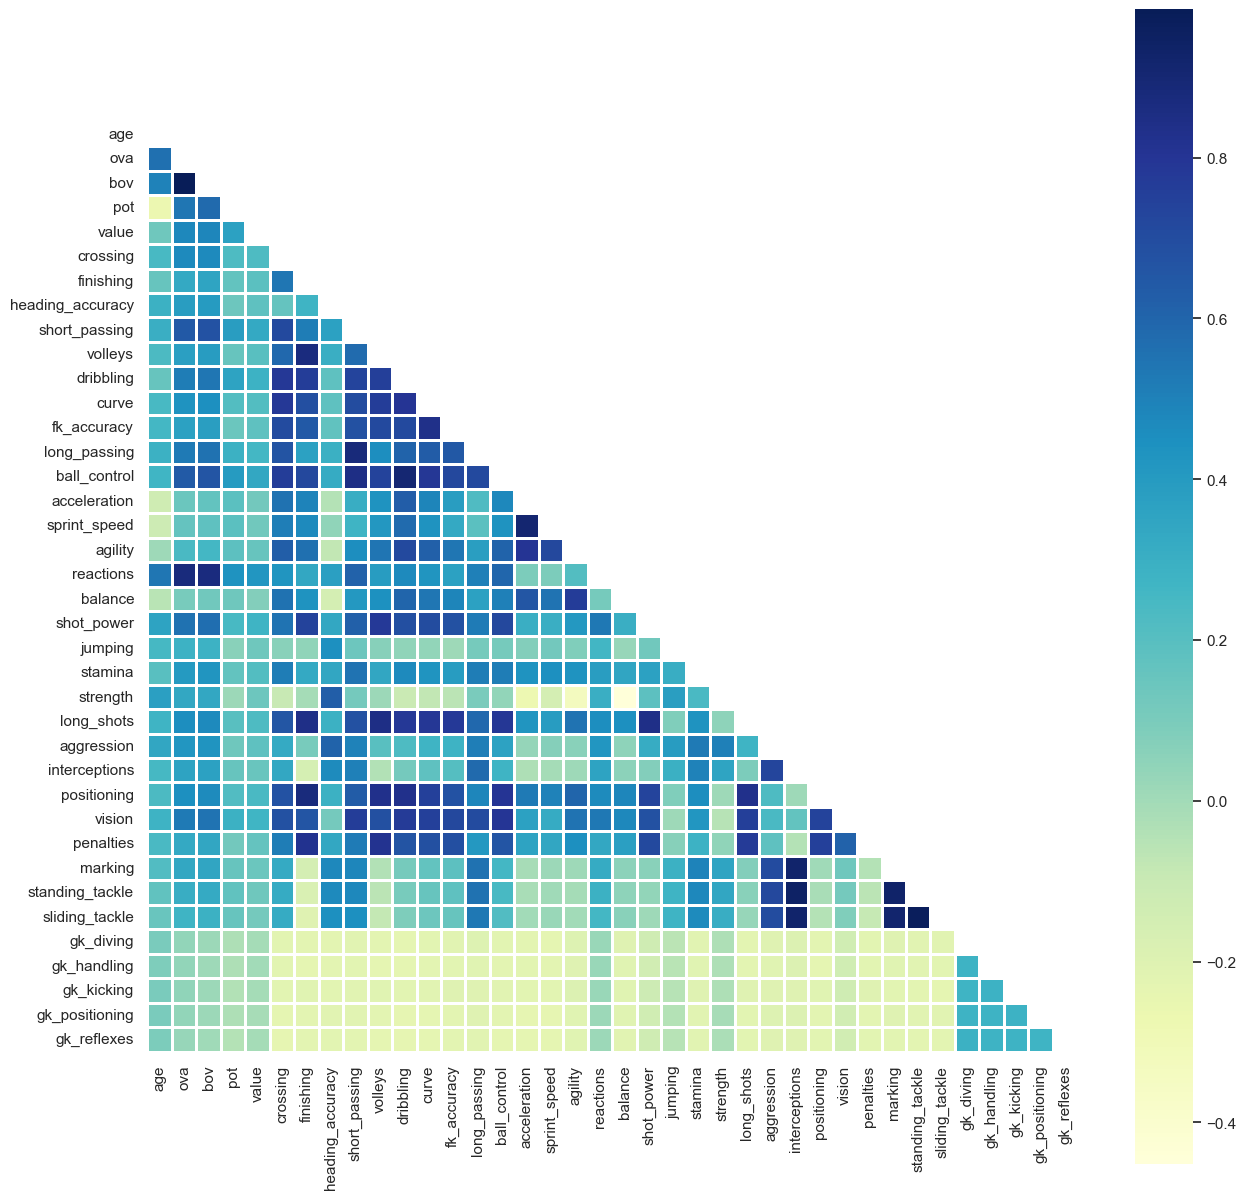

In [154]:
mask = np.zeros_like(correlations_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(correlations_matrix, mask=mask,square=True,linewidths=.8,cmap="YlGnBu")
 

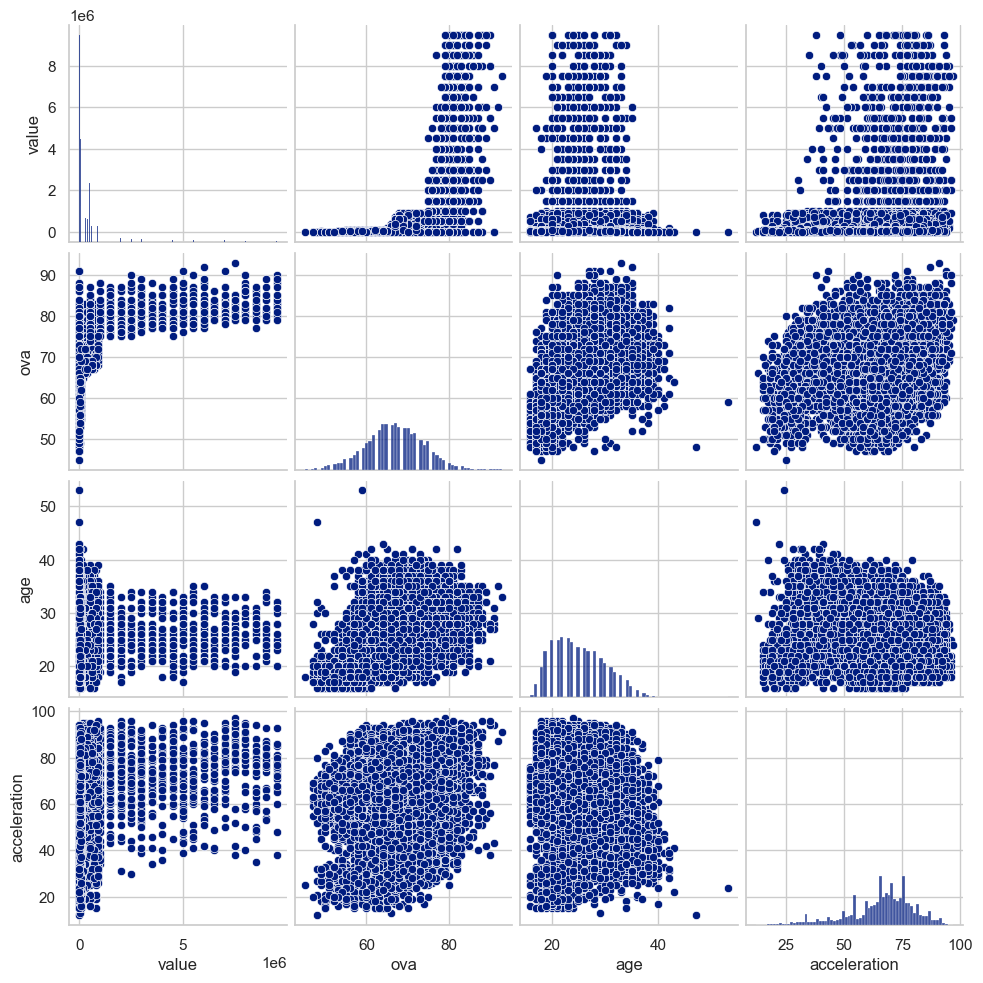

In [155]:
sns.pairplot(dataPosition[["value","ova","age","acceleration"]])

## - Preprocessing

In [156]:
numerical_scal = MinMaxScaler().fit(num) 
numerical_minmax = numerical_scal.transform(num) 
numerical_minmax

array([[0.45945946, 0.5       , 0.55102041, ..., 0.15217391, 0.09782609,
        0.12359551],
       [0.56756757, 0.54166667, 0.53061224, ..., 0.13043478, 0.10869565,
        0.11235955],
       [0.45945946, 0.54166667, 0.55102041, ..., 0.13043478, 0.16304348,
        0.06741573],
       ...,
       [0.05405405, 0.22916667, 0.24489796, ..., 0.04347826, 0.11956522,
        0.07865169],
       [0.10810811, 0.35416667, 0.36734694, ..., 0.07608696, 0.05434783,
        0.08988764],
       [0.05405405, 0.29166667, 0.34693878, ..., 0.08695652, 0.15217391,
        0.08988764]])

In [157]:
numerical_scaled = pd.DataFrame(numerical_minmax,columns=num.columns)
numerical_scaled.head() 

age       ova       bov       pot     value  crossing  finishing  \
0  0.459459  0.500000  0.551020  0.458333  0.002632  0.784091   0.510870   
1  0.567568  0.541667  0.530612  0.500000  0.000000  0.704545   0.663043   
2  0.459459  0.541667  0.551020  0.500000  0.010526  0.840909   0.663043   
3  0.540541  0.750000  0.775510  0.708333  0.052632  0.784091   0.717391   
4  0.297297  0.437500  0.448980  0.479167  0.002632  0.625000   0.543478   

   heading_accuracy  short_passing   volleys  dribbling     curve  \
0          0.613636       0.735632  0.627907   0.747253  0.677778   
1          0.636364       0.793103  0.744186   0.703297  0.833333   
2          0.409091       0.804598  0.825581   0.813187  0.888889   
3          0.556818       0.954023  0.872093   0.879121  0.844444   
4          0.420455       0.586207  0.616279   0.681319  0.633333   

   fk_accuracy  long_passing  ball_control  acceleration  sprint_speed  \
0     0.617978      0.714286      0.725275      0.658824      0.734940   
1     0.831461      0.738095      0.725275      0.517647      0.445783   
2     0.808989      0.714286      0.802198      0.423529      0.349398   
3     0.730337      0.880952      0.934066      0.576471      0.518072   
4     0.415730      0.416667      0.626374      0.917647      0.939759   

    agility  reactions  balance  shot_power   jumping   stamina  strength  \
0  0.658537   0.633803   0.6375    0.740741  0.630137  0.674419  0.641975   
1  0.585366   0.577465   0.6875    0.753086  0.438356  0.616279  0.543210   
2  0.695122   0.492958   0.7250    0.716049  0.493151  0.209302  0.493827   
3  0.792683   0.718310   0.7250    0.654321  0.246575  0.546512  0.567901   
4  0.743902   0.577465   0.8500    0.703704  0.657534  0.616279  0.555556   

   long_shots  aggression  interceptions  positioning    vision  penalties  \
0    0.711111    0.724138       0.730337     0.655914  0.658824   0.494253   
1    0.744444    0.712644       0.752809     0.752688  0.741176   0.781609   
2    0.722222    0.689655       0.393258     0.720430  0.752941   0.678161   
3    0.733333    0.563218       0.741573     0.817204  0.976471   0.735632   
4    0.500000    0.620690       0.247191     0.655914  0.564706   0.448276   

    marking  standing_tackle  sliding_tackle  gk_diving  gk_handling  \
0  0.736264         0.727273        0.707865   0.146067     0.043956   
1  0.736264         0.431818        0.382022   0.089888     0.120879   
2  0.351648         0.329545        0.269663   0.089888     0.054945   
3  0.714286         0.590909        0.561798   0.056180     0.131868   
4  0.208791         0.238636        0.280899   0.078652     0.131868   

   gk_kicking  gk_positioning  gk_reflexes  
0    0.152174        0.097826     0.123596  
1    0.130435        0.108696     0.112360  
2    0.130435        0.163043     0.067416  
3    0.054348        0.130435     0.067416  
4    0.065217        0.086957     0.089888

In [158]:
numerical_scaled.describe()

age           ova           bov           pot         value  \
count  16991.000000  16991.000000  16991.000000  16991.000000  16991.000000   
mean       0.249075      0.457333      0.487570      0.531138      0.036031   
std        0.132291      0.142551      0.135034      0.119394      0.107613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.135135      0.354167      0.408163      0.458333      0.001053   
50%        0.243243      0.458333      0.489796      0.520833      0.005263   
75%        0.351351      0.562500      0.571429      0.604167      0.031579   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

           crossing     finishing  heading_accuracy  short_passing  \
count  16991.000000  16991.000000      16991.000000   16991.000000   
mean       0.519638      0.489724          0.553508       0.616277   
std        0.201973      0.209892          0.190909       0.158896   
min        0.000000      0.000000          0.000000       0.000000   
25%        0.397727      0.326087          0.465909       0.563218   
50%        0.568182      0.532609          0.590909       0.655172   
75%        0.670455      0.663043          0.681818       0.712644   
max        1.000000      1.000000          1.000000       1.000000   

            volleys     dribbling         curve   fk_accuracy  long_passing  \
count  16991.000000  16991.000000  16991.000000  16991.000000  16991.000000   
mean       0.477960      0.582258      0.507667      0.443278      0.540568   
std        0.205396      0.196673      0.201099      0.195762      0.175963   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.325581      0.527473      0.377778      0.303371      0.428571   
50%        0.488372      0.637363      0.533333      0.426966      0.571429   
75%        0.639535      0.714286      0.666667      0.595506      0.666667   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       ball_control  acceleration  sprint_speed       agility     reactions  \
count  16991.000000  16991.000000  16991.000000  16991.000000  16991.000000   
mean       0.612778      0.629801      0.632849      0.618062      0.547998   
std        0.172618      0.171707      0.173251      0.174647      0.127088   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.571429      0.552941      0.554217      0.524390      0.464789   
50%        0.648352      0.658824      0.662651      0.646341      0.549296   
75%        0.714286      0.741176      0.746988      0.743902      0.633803   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

            balance    shot_power       jumping       stamina      strength  \
count  16991.000000  16991.000000  16991.000000  16991.000000  16991.000000   
mean       0.597261      0.565365      0.591609      0.609536      0.608745   
std        0.174988      0.164313      0.163254      0.177039      0.155873   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.500000      0.444444      0.493151      0.523256      0.518519   
50%        0.625000      0.580247      0.602740      0.639535      0.629630   
75%        0.725000      0.691358      0.698630      0.732558      0.716049   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

         long_shots    aggression  interceptions   positioning        vision  \
count  16991.000000  16991.000000   16991.000000  16991.000000  16991.000000   
mean       0.502632      0.552428       0.484577      0.542602      0.535319   
std        0.210680      0.195218       0.233721      0.204040      0.161025   
min        0.000000      0.000000       0.000000      0.000000      0.000000   
25%        0.355556      0.413793       0.247191      0.440860      0.435294   
50%        0.555556      0.586207       0.550562      0.5

In [159]:
import pycountry_convert as pc

def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

# Example

cat['nationality'] = cat['nationality'].apply(country_to_continent)

ModuleNotFoundError: No module named 'pycountry_convert'

In [160]:
cat = cat.drop(['club'],axis=1)
X_dumm = pd.get_dummies(cat) # You can put X, not separating variables is needed.
X_dumm

nationality_Afghanistan  nationality_Albania  nationality_Algeria  \
0                            0                    0                    0   
1                            0                    0                    0   
2                            0                    0                    0   
4                            0                    0                    0   
5                            0                    0                    0   
...                        ...                  ...                  ...   
17120                        0                    0                    0   
17121                        0                    0                    0   
17122                        0                    0                    0   
17123                        0                    0                    0   
17124                        0                    0                    0   

       nationality_Andorra  nationality_Angola  \
0                        0                   0   
1                        0                   0   
2                        0                   0   
4                        0                   0   
5                        0                   0   
...                    ...                 ...   
17120                    0                   0   
17121                    0                   0   
17122                    0                   0   
17123                    0                   0   
17124                    0                   0   

       nationality_Antigua &amp; Barbuda  nationality_Argentina  \
0                                      0                      0   
1                                      0                      0   
2                                      0                      0   
4                                      0                      0   
5                                      0                      0   
...                                  ...                    ...   
17120                                  0                      0   
17121                                  0                      0   
17122                                  0                      0   
17123                                  0                      0   
17124                                  0                      0   

       nationality_Armenia  nationality_Aruba  nationality_Australia  \
0                        0                  0                      0   
1                        0                  0                      0   
2                        0                  0                      0   
4                        0                  0                      0   
5                        0                  0                      0   
...                    ...                ...                    ...   
17120                    0                  0                      0   
17121                    0                  0                      0   
17122                    0                  0                      0   
17123                    0                  0                      0   
17124                    0                  0                      0   

       nationality_Austria  nationality_Azerbaijan  nationality_Barbados  \
0                        0                       0                     0   
1                        0                       0                     0   
2                        0                       0                     0   
4                        0                       0                     0   
5                        0                       0                     0   
...                    ...                     ...                   ...   
17120                    0                       0                     0   
17121                    0                       0                     0   
17122                    0                       0                     0   
17123                    0                       0             

In [184]:
finaldata = pd.concat([num,X_dumm],axis=1)
finaldata.head()

age  ova  bov  pot     value  crossing  finishing  heading_accuracy  \
0   33   69   71   69   25000.0        75         50                59   
1   37   71   70   71       0.0        68         64                61   
2   33   71   71   71  100000.0        80         64                41   
4   36   81   82   81  500000.0        75         69                54   
5   27   66   66   70   25000.0        61         53                42   

   short_passing  volleys  dribbling  curve  fk_accuracy  long_passing  \
0             71     58.0         73   65.0           60            69   
1             76     68.0         69   79.0           79            71   
2             77     75.0         79   84.0           77            69   
4             90     79.0         85   80.0           70            83   
5             58     57.0         67   61.0           42            44   

   ball_control  acceleration  sprint_speed  agility  reactions  balance  \
0            71            68            74     68.0         69     68.0   
1            71            56            50     62.0         65     72.0   
2            78            48            42     71.0         59     75.0   
4            90            61            56     79.0         75     75.0   
5            62            90            91     75.0         65     85.0   

   shot_power  jumping  stamina  strength  long_shots  aggression  \
0          74     68.0       69        68          68          72   
1          75     54.0       64        60          71          71   
2          72     58.0       29        56          69          69   
4          67     40.0       58        62          70          58   
5          71     70.0       64        61          49          63   

   interceptions  positioning  vision  penalties  marking  standing_tackle  \
0           69.0         63.0    66.0         50       70               69   
1           71.0         72.0    73.0         75       70               43   
2           39.0         69.0    74.0         66       35               34   
4           70.0         78.0    93.0         71       68               57   
5           26.0         63.0    58.0         46       22               26   

   sliding_tackle  gk_diving  gk_handling  gk_kicking  gk_positioning  \
0            69.0         14            5          15              10   
1            40.0          9           12          13              11   
2            30.0          9            6          13              16   
4            56.0          6           13           6              13   
5            31.0          8           13           7               9   

   gk_reflexes  nationality_Afghanistan  nationality_Albania  \
0           12                        0                    0   
1           11                        0                    0   
2            7                        0                    0   
4            7                        0                    0   
5            9                        0                    0   

   nationality_Algeria  nationality_Andorra  nationality_Angola  \
0                    0                    0                   0   
1                    0                    0                   0   
2                    0                    0                   0   
4                    0                    0                   0   
5                    0                    0                   0   

   nationality_Antigua &amp; Barbuda  nationality_Argentina  \
0                                  0                      0   
1                                  0                      0   
2                                  0                      0   
4                                  0                      0   
5                                  0                      0   

   nationality_Armenia  nationality_Aruba  nationality_Australia  \
0                    0                  0                      0   
1                    0        

In [188]:
y = finaldata["ova"]
x = finaldata.drop(["ova"], axis=1)

In [189]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42) #70% rows training, 30% testing
# Before transforming and preprocessing data (remark)
model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [190]:
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)
print("r2 = ", r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)
print("MAE = ", MAE)

r2 =  0.9822159377974558
RMSE =  0.9128545201340602
MSE =  0.8333033749291854
MAE =  0.689307566029684


In [191]:
y.describe()

count    16991.000000
mean        66.951975
std          6.842441
min         45.000000
25%         62.000000
50%         67.000000
75%         72.000000
max         93.000000
Name: ova, dtype: float64

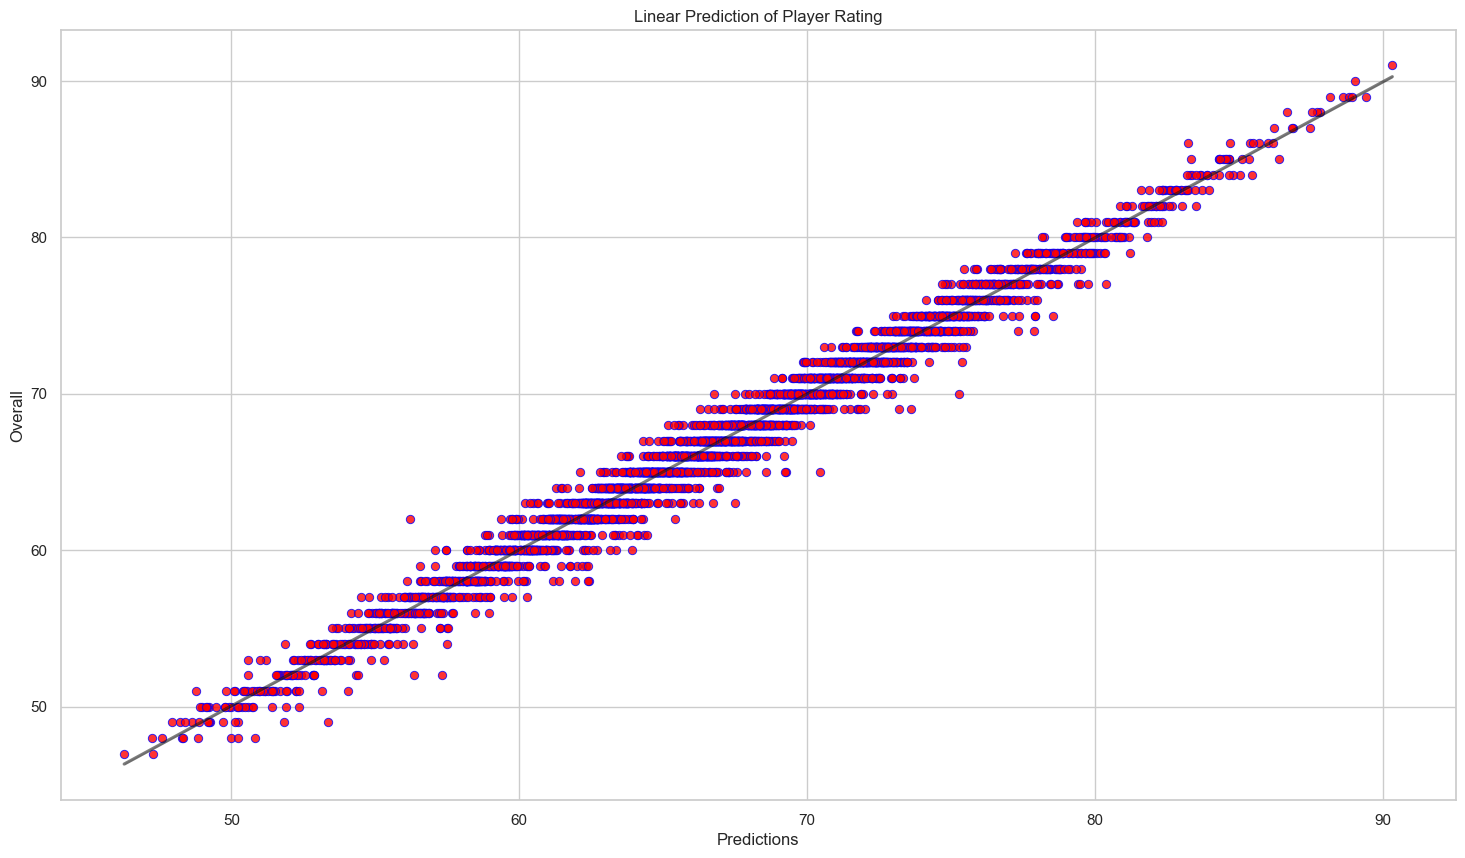

In [165]:
plt.figure(figsize=(18,10))
sns.regplot(predictions,y_test,scatter_kws={'color':'red','edgecolor':'blue','linewidth':0.7},line_kws={'color':'black','alpha':0.5})
plt.xlabel('Predictions')
plt.ylabel('Overall')
plt.title("Linear Prediction of Player Rating")
plt.show()

In [ ]:
###################################################


## Split in 4 main groups: GK, DF, MF and AT

In [ ]:
data["BP"].unique()

In [ ]:
#Goalkeeper
GK = data[["ID", "Name", "Age", "Club", "OVA", "BP", "Value","Goalkeeping", "GK Diving", "GK Handling", "GK Kicking", "GK Positioning", "GK Reflexes", "Total Stats"]]
GK = GK.loc[GK['BP'] == "GK"]
GK = GK.drop(['BP'],axis=1)
GK.head()

In [ ]:
GK.shape

In [ ]:
#Defender
DF = data[["ID", "Name", "Age", "Club", "OVA", "BP", "Value","Heading Accuracy","Short Passing","Long Passing","Ball Control","Movement","Acceleration","Sprint Speed","Agility","Reactions","Balance","Jumping","Stamina","Strength","Mentality","Aggression","Interceptions","Positioning","Defending","Marking","Standing Tackle","Sliding Tackle","Total Stats"]]
DF = DF.loc[DF['BP'].isin(["LWB","CB","RWB","LB","RB"])]          
DF = DF.drop(['BP'],axis=1)
DF.head()

In [ ]:
DF.shape

In [ ]:
#Midfielder
MF = data[["ID", "Name","Nationality", "Age", "Club", "OVA", "BP", "Value","Attacking","Crossing","Finishing","Heading Accuracy","Short Passing","Volleys","Skill","Dribbling","Curve","FK Accuracy","Long Passing","Ball Control","Movement","Acceleration","Sprint Speed","Agility","Reactions","Balance","Power","Shot Power","Jumping","Stamina","Strength","Long Shots","Mentality","Aggression","Interceptions","Positioning","Vision","Penalties","Defending","Marking","Standing Tackle","Sliding Tackle","Total Stats"]]
MF = MF.loc[MF['BP'].isin(["CDM","CM","CAM","RM","LM"])]
MF = MF.drop(['BP'],axis=1)
MF.head()

In [ ]:
MF.shape

In [ ]:
#Attacker
AT = data[["ID", "Name", "Age", "Club", "OVA", "BP", "Value", "Attacking", "Crossing","Finishing","Heading Accuracy","Short Passing","Volleys","Skill","Dribbling","FK Accuracy", "Acceleration", "Sprint Speed","Power","Shot Power","Stamina","Strength","Penalties","Long Shots","Mentality","Total Stats"]]
AT = AT.loc[AT['BP'].isin(["ST","CF","LW","RW"])]#selecting positions that apply to an attacker
AT = AT.drop(['BP'],axis=1)#dropping BP because we dont need it anymore
AT.head()

In [ ]:
AT.shape

## Data Cleaning


#### Time for Defenders

In [ ]:
DF.isnull().sum()

In [ ]:
missing_jumping = DF[DF['Jumping'].isnull()].index.tolist()
missing_balance = DF[DF['Balance'].isnull()].index.tolist()
if missing_jumping == missing_balance:
    print('They are same')
else:
    print('They are different')

In [ ]:
DF = DF[DF['Club'].notna()]
DF = DF[DF['Agility'].notna()]
DF.shape

In [ ]:
DF.isnull().sum()

#### Time for Midfielders

In [ ]:
MF.isnull().sum()

In [ ]:
missing_agility = MF[MF['Agility'].isnull()].index.tolist()
missing_balance = MF[MF['Balance'].isnull()].index.tolist()
if missing_agility == missing_balance:
    print('They are same')
else:
    print('They are different')

In [ ]:
MF = MF[MF['Club'].notna()]
MF = MF[MF['Agility'].notna()]
MF.shape

In [ ]:
MF.isnull().sum()

In [ ]:
def value_to_int(df_value):
    try:
        value = float(df_value[1:-1])
        suffix = df_value[-1:]

        if suffix == 'M':
            value = value * 1000000
        elif suffix == 'K':
            value = value * 1000
    except ValueError:
        value = 0
    return value

DF['Value'] = DF['Value'].apply(value_to_int)
MF['Value'] = MF['Value'].apply(value_to_int)

## EDA (we will explore the features)


In [ ]:
GK_features=GK[["GK Diving", "GK Handling", "GK Kicking", "GK Positioning", "GK Reflexes"]]
GK_features.head()

In [ ]:
DF_features=DF[["Heading Accuracy","Short Passing","Long Passing","Ball Control","Acceleration","Sprint Speed","Agility","Reactions","Balance","Jumping","Stamina","Strength","Aggression","Interceptions","Positioning","Marking","Standing Tackle","Sliding Tackle"]]
DF_features.head()

In [ ]:
MF_features=MF[["Crossing","Finishing","Heading Accuracy","Short Passing","Volleys","Dribbling","Curve","FK Accuracy","Long Passing","Ball Control","Acceleration","Sprint Speed","Agility","Reactions","Balance","Shot Power","Jumping","Stamina","Strength","Long Shots","Aggression","Interceptions","Positioning","Vision","Penalties","Marking","Standing Tackle","Sliding Tackle"]]
MF_features.head()

In [ ]:
AT_features=AT[[ "Crossing","Finishing","Heading Accuracy","Short Passing","Volleys","Dribbling","FK Accuracy", "Acceleration", "Sprint Speed","Shot Power","Stamina","Strength","Penalties","Long Shots"]]
AT_features.head()

In [ ]:
from math import pi
#######################################################################
idx = 1
top_features = dict(MF_features.mean().sort_values(ascending=False)[:5])
    
    # number of variable
categories=top_features.keys()
N = len(categories)

# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values = list(top_features.values())
values += values[:1]

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
ax = plt.subplot(1, 1, idx, polar=True)

# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='grey', size=8)
 # Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([25,50,75], ["25","50","75"], color="grey", size=7)
plt.ylim(0,100)
    
    
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')

# Fill area
ax.fill(angles, values, 'b', alpha=0.1)
    
plt.title("MF top 5 features", size=20, y=1.1)
##############################################

In [ ]:
from math import pi
idx = 1
top_features = dict(DF_features.mean().sort_values(ascending=False)[:5])
    
    # number of variable
categories=top_features.keys()
N = len(categories)

# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values = list(top_features.values())
values += values[:1]

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
ax = plt.subplot(1, 1, idx, polar=True)

# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='grey', size=8)
 # Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([25,50,75], ["25","50","75"], color="grey", size=7)
plt.ylim(0,100)
    
    
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')

# Fill area
ax.fill(angles, values, 'b', alpha=0.1)
    
plt.title("DF top 5 features", size=20, y=1.1)
    

In [ ]:
from math import pi
idx = 1
top_features = dict(AT_features.mean().sort_values(ascending=False)[:5])
    
    # number of variable
categories=top_features.keys()
N = len(categories)

# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values = list(top_features.values())
values += values[:1]

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
ax = plt.subplot(1, 1, idx, polar=True)

# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='grey', size=8)
 # Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([25,50,75], ["25","50","75"], color="grey", size=7)
plt.ylim(0,100)
    
    
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')

# Fill area
ax.fill(angles, values, 'b', alpha=0.1)
    
plt.title("AT top 5 features", size=20, y=1.1)
    

In [ ]:
from math import pi
idx = 1
top_features = dict(GK_features.mean().sort_values(ascending=False)[:5])
    
    # number of variable
categories=top_features.keys()
N = len(categories)

# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values = list(top_features.values())
values += values[:1]

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
ax = plt.subplot(1, 1, idx, polar=True)

# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='grey', size=8)
 # Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([25,50,75], ["25","50","75"], color="grey", size=7)
plt.ylim(0,100)
    
    
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')

# Fill area
ax.fill(angles, values, 'b', alpha=0.1)
    
plt.title("GK top 5 features", size=20, y=1.1)
    

In [ ]:
y = MF_features["OVA"]
x = MF_features.drop(["OVA"], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42) #70% rows training, 30% testing
# Before transforming and preprocessing data (remark)
model = LinearRegression()
model.fit(X_train,y_train)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)
print("r2 = ", r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)
print("MAE = ", MAE)

In [ ]:
plt.figure(figsize=(18,10))
sns.regplot(predictions,y_test,scatter_kws={'color':'red','edgecolor':'blue','linewidth':0.7},line_kws={'color':'black','alpha':0.5})
plt.xlabel('Predictions')
plt.ylabel('Overall')
plt.title("Linear Prediction of Player Rating")
plt.show()

In [ ]:
MF["Club"].unique().tolist()

In [ ]:
topclubs = ('Manchester United','Inter','Paris Saint-Germain','Manchester City','FC Barcelona','Borussia Dortmund','Napoli','FC Bayern München','Chelsea','Real Madrid','Juventus','Arsenal','Liverpool',)

In [ ]:
topnationals=('Brazil','Argentina','France','Belgium','England','Netherlands','Croatia','Italy','Portugal','Spain')